# What makes a video game succeed?
## Planning 2017 Campaing for Online Video Game Store

## Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


## Objective: What makes a game succeed?

* Answer: **What makes a game succeed?"**
* Interpret findings for online game store to use to "to spot potential big winners and plan advertising campaigns"

## Assumption(s)

Sales are not adjusted for inflation (and will not be corrected, out of scope)

In this project, a "game" will be defined by the unique combination of name, console. and year (not just name). 

For example:
    * 'Super Mario Bros.' was released on the Nintendo Entertainment System (NES) and GameBoy (GB). In this project, these 2 versions are considered two different games despite having the same name.
    * There a 12 variations of 'Need for Speed: Most Wanted' across different platforms and release years. Each variation is its own row. We are not aggregating these together.

## Data Description

* Name
* Platform
* Year_of_Release
* Genre
* NA_sales (North American sales in USD million)
* EU_sales (sales in Europe in USD million)
* JP_sales (sales in Japan in USD million)
* Other_sales (sales in other countries in USD million)
* Critic_Score (maximum of 100)
* User_Score (maximum of 10)
* Rating (ESRB)

Data for 2016 may be incomplete.

**ESRB Rating Guide as found [HERE](https://www.esrb.org/ratings-guide/)**
* RP = Rating Pending
* EC = Early Childhood
* E = Everyone
* E10+ = Everyone 10+ years old
* T = Teen (13+ years old)
* M = Mature (17+ years Old)
* AO = Adults Only (18+ years old and very explictly, often used for pornographic)

**Platform Dictionary, including manufacturer:**
* Wii - Nintendo Wii
* DS - Nintendo DS
* X360 - XBox 360 (Microsoft)
* PS3 - PlayStation 3 (Sony)
* PS2 - PlayStation 2 (Sony)
* GBA - Nintendo GameBoy Advance
* PS4 - PlayStation 4 (Sony)
* 3DS - Nintendo 3DS
* XB - XBox (Sony), original 
* PC - Personal Company, PC
* PSP - PlayStation Portable (Sony)
* XOne - XBox One (Sony)
* WiiU - Nintendo WiiU
* NES - Nintendo Entertainment System
* GB - Nintendo GameBoy
* SNES - Nintendo SuperNintendo Entertainment System
* N64 - Nintendo 64
* PS - PlayStation (Sony), original
* 2600 - Atari 2600
* GC - Nintendo GameCube
* GEN - Sega Genesis
* DC - Sega Dreamcast
* PSV - PlayStation Vita (Sony)
* SAT - Sega Saturn
* SCD - Seca CD
* WS - WonderSwan (Bandai)
* NG - Neo Geo (SNK Corporation)
* TG16 -  TurboGrafx-16, also known as PC Engine (NEC Home Electronics)
* 3DO - 3DO Interactive Multiplayer (The 3DO Company)
* GG - Sega Game Gear
* PCFX - PC-FX (NEC Home Electronics and Hudson Soft)


## Table of Contents

Steps
1. [Import Requirements, upload data, and preview data](#step1)
2. [Preprocess data: clean and transform data](#step2)
3. [Exploratory Data Analysis](#step3)
4. [Segmentation Analysis per geographic region](#step4)
5. [Test hypotheses on user ratings](#step5)
6. [Conclusion](#step6)


## 1) Data Upload and Preview <a class="anchor" id="step1"></a>

**Step 1.** Open the data file and study the general information

File path: /datasets/games.csv . Download dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('./games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


At first glance, it seems this data has rows per video game release (possibly "name" might be repeated when released for multiple platforms. Expect name+platform combinations to be unique

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.isna().sum() / len(df)

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [7]:
original_len = len(df)
original_len

16715

At first glance, potential to change some **variables to categorical** (platform, genre) and float variables to integer but Year of Release, Critic_Score, User_Score, and Rating have nulls. The 2 **nulls** in name must be dropped the other 3 columns with over 40% nulls need to be analyzed further.

Also, **column names should be changed to lower case** to avoid future errors.

In [8]:
#Is name unique?
df['Name'].nunique() == len(df)

False

In [9]:
df['Name'].value_counts().head(3)

Need for Speed: Most Wanted    12
FIFA 14                         9
LEGO Marvel Super Heroes        9
Name: Name, dtype: int64

In [10]:
# Example of why name would appear more than once.
df.loc[df['Name']=='Super Mario Bros.']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
201,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN


In [11]:
#The extreme case appearing many times. Why?
df.loc[df['Name']=='Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [12]:
len(df.loc[df['Name']=='Need for Speed: Most Wanted'])

12

In here, we just clarified that games should be unique combination of name, console, and release year. 

In [13]:
# is the combination of Name and Platform unique?
df['game_key'] = df['Name']+ ' ' + df['Platform']
df['game_key'].nunique() == len(df)

False

In [14]:
df['game_key'].value_counts().head()

Need for Speed: Most Wanted PC      2
Need for Speed: Most Wanted X360    2
Sonic the Hedgehog PS3              2
Madden NFL 13 PS3                   2
nail'd PS3                          1
Name: game_key, dtype: int64

There are 4 games that may be duped as name +year combination appears more than once.

In [15]:
df.loc[df['game_key']=='Sonic the Hedgehog PS3']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,game_key
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,Sonic the Hedgehog PS3
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,Sonic the Hedgehog PS3


Second will be dropped when games with Year of Release null dropped.

In [16]:
df.loc[df['game_key']=='Madden NFL 13 PS3']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,game_key
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,Madden NFL 13 PS3
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,Madden NFL 13 PS3


This is an exact dupe. We need to **drop df[16230], a dupe of Madden NFL 13 PS3**

In [17]:
df.loc[df['game_key']=='Need for Speed: Most Wanted X360']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,game_key
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,Need for Speed: Most Wanted X360
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,Need for Speed: Most Wanted X360


After a quick search, these are two different games with the most recent being an advanced version of the earlier. No action needed.

In [18]:
df.loc[df['game_key']=='Need for Speed: Most Wanted PC']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,game_key
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T,Need for Speed: Most Wanted PC
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T,Need for Speed: Most Wanted PC


After a quick search, these are two different games with the most recent being an advanced version of the earlier. No action needed.

In [19]:
del df['game_key']

In [20]:
df['Name'].nunique()

11559

We have data on 11,559 games. As expected name is not unique because the same name can be dropped in different platforms.

3 games are dupes

In [21]:
#How many platforms?
df['Platform'].nunique()

31

In [22]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

There are 31 platforms. We can **make this categorical**. If within scope, consider adding a **console_manufacturer** to the df for futher aggregation. e.g. Wii, NES, GB, DS, SNES, GBA, 3DS, N64, etc categorized as 'Nintendo'

In [23]:
df['Year_of_Release'].isna().sum() / len(df)

0.01609332934489979

In [24]:
df['Year_of_Release'].min()

1980.0

In [25]:
df['Year_of_Release'].max()

2016.0

In [26]:
df['Year_of_Release'].nunique()

37

In [27]:
# Do we have games for every year between?
(df['Year_of_Release'].max() - df['Year_of_Release'].min()) + 1 == df['Year_of_Release'].nunique()

True

Our data spans from 1980 to 2016 and we have data on every year. The 'Year of Release' column is null less than 2% of the time as this is expected to be important information. Most likely **nulls will be dropped** and column **changed to integer** then

In [28]:
df['Genre'].nunique()

12

In [29]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

There are 12 genres and they are self-explanatory. Sould be **changed to categorical** and **lower case** to avoid case errors later when searching.

In [30]:
df[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].describe()

,NA_sales,EU_sales,JP_sales,Other_sales
count,16715.000000,16715.000000,16715.000000,16715.000000
mean,0.263377,0.145060,0.077617,0.047342
std,0.813604,0.503339,0.308853,0.186731
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Data in USD millions across. Hence, unit is comparable

Note - These fields seem to have **outliers** in the top (games that sold way more than compared to the majority of games in that region). **Distributions** should be looked at per region as stdev indicates different spreads and possibly different distributions.

In [31]:
df['Critic_Score'].isna().sum()

8578

In [32]:
df['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

Score could be 0-100. Whole numbers. **Change to integer**

There are **nulls** in Critic Score. Explore nulls further to handle

In [33]:
df['User_Score'].isna().sum()

6701

In [34]:
df['User_Score'].value_counts().head()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: User_Score, dtype: int64

Score could be 0-10 but includes decimals  (apparently one)

User score must be changed from object to **float**.

There are **nulls** in User Score. Explore nulls further to handle

In [35]:
df['Rating'].isna().sum()

6766

In [36]:
df['Rating'].nunique()

8

In [37]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

8 ratings. Could be **changed to categorical**. 

There are **nulls** in Rating. Explore nulls further to handle

### Step 1: Conclusion

We have 36 years of video game relases per console (almost 12k games) with their sales in USD million for 4 regions (North America, Japan, Europe, and Others) with their corresponding ratings, critic and user scores. The data is thankfully self-explanatory and clear. Below are some steps identified to complete in data preprocessing

* make column names lowercase
* update data types
    * user score to float
    * critic score and year of release to integers
    * platform, genre, and rating to categorical
* Make genre values lower case
* Drop 'name' & 'Year_of_Release' nulls
* Drop dupe of Madden NFL 13 PS3 at df[16230]
* Handle nulls in Critic Score, User Score, and Rating

Bonus
* add console_manufacturer column

Keep in Mind 
* Outliers in Sales numbers

## 2) Data Preprocessing <a class="anchor" id="step2"></a>

**Step 2.** Prepare the data

* Replace the column names (make them lowercase).
* Convert the data to the required types.
* Describe the columns where the data types have been changed and why.
* If necessary, decide how to deal with missing values:
    * Explain why you filled in the missing values as you did or why you decided to leave them blank.
    * Why do you think the values are missing? Give possible reasons.
    * Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
* Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.


**Making column names (and genre) lowercase**

In [38]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [39]:
df.columns = df.columns.str.lower()

In [40]:
# confirm column names lower case
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [41]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [42]:
df['genre'] = df['genre'].str.lower()

In [43]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Making strings to be used often as a standard case (in here, lowercase) is helpful to prevent case errors or wasting time re-checking column format in the future

**Drop nulls in Name and Year of Release**

I will drop all records were the Name is empty (just 2 of them) as I expect these are in error and year of release as that should have a big effect in sales (games in 1960 were not priced the same as games in 2000s)

In [44]:
original_len

16715

In [45]:
# max rows to drop
df['name'].isna().sum() + df['year_of_release'].isna().sum()

271

In [46]:
# drop where name is empty
df = df.dropna(subset=['name']) 
len(df)

16713

In [47]:
# drop where year of relase is empty
df = df.dropna(subset=['year_of_release']) 
len(df)

16444

In [48]:
1-(len(df)/original_len)

0.016212982351181626

Dropped less than 2% of the data. Now that these are nulls, we can correct data type in year_of_release

**Convert the data to the required types.**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


When attempting to convert user_score to float. Error "ValueError: could not convert string to float: 'tbd'" showed "tbd" used instead of null. That 'tbd' needs to be replaced by null

In [50]:
#replacing "tbd" in user_score with null
df['user_score'] = np.where(df['user_score'] == 'tbd', None, df['user_score'])

In [51]:
#integers
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = df['critic_score'].astype('Int64') #Int64 will do change even with nulls

#float (1dec)
df['user_score'] = df['user_score'].astype(float)

#categories
df['platform'] = df['platform'].astype('category')
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null category
year_of_release    16444 non-null int32
genre              16444 non-null category
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         7463 non-null float64
rating             9768 non-null category
dtypes: Int64(1), category(3), float64(5), int32(1), object(1)
memory usage: 1.1+ MB


user score was incorrectly set as an object but it is numeric and speficically a float. This correction will allow numerical analysis.

Year of release was changed to integer as the values are whole numbers. A bonus is that integers take less memory than floats. 

platform, genre, and rating were changed to category as the data does represent categories (a finite list of strings) and saving as categories instead of string/objects helps with memory. We can see that "memory usage" was improved post data type changes

**Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column**

In [53]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [54]:
#confirm
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null category
year_of_release    16444 non-null int32
genre              16444 non-null category
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         7463 non-null float64
rating             9768 non-null category
total_sales        16444 non-null float64
dtypes: Int64(1), category(3), float64(6), int32(1), object(1)
memory usage: 1.3+ MB


**Analyze remaining Nulls**

In [56]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

In [57]:
# is critic score null in certain years?
df.loc[df['critic_score'].isna()]['year_of_release'].value_counts().sort_values() / len(df)

1980    0.000547
1985    0.000791
1988    0.000851
1984    0.000851
1990    0.000973
1987    0.000973
1983    0.001034
1989    0.001034
1986    0.001277
1982    0.002189
1991    0.002493
1992    0.002554
1981    0.002797
1993    0.003649
1994    0.007297
2001    0.009487
2003    0.011554
2004    0.012223
2002    0.012284
2000    0.012588
1995    0.013318
1996    0.015507
2016    0.016419
2013    0.016480
1997    0.016541
2005    0.017271
1999    0.018183
2014    0.019460
2012    0.020190
1998    0.021345
2015    0.023170
2006    0.023474
2007    0.030710
2011    0.038677
2008    0.043298
2010    0.045913
2009    0.047130
Name: year_of_release, dtype: float64

In [58]:
# is critic score null for certain platforms?
df.loc[df['critic_score'].isna()]['platform'].value_counts() / len(df)

DS      0.085928
PS      0.060448
PS2     0.051812
PSP     0.044819
Wii     0.043663
PS3     0.030528
GBA     0.023170
3DS     0.021041
X360    0.020555
N64     0.019217
PSV     0.018852
PC      0.015690
SNES    0.014534
SAT     0.010521
PS4     0.008514
2600    0.007054
GC      0.006385
NES     0.005960
XB      0.005899
GB      0.005899
XOne    0.004743
WiiU    0.003466
DC      0.002311
GEN     0.001642
NG      0.000730
SCD     0.000365
WS      0.000365
3DO     0.000182
TG16    0.000122
PCFX    0.000061
GG      0.000061
Name: platform, dtype: float64

In [59]:
# is rating empty for earlier years?
df.loc[df['rating'].isna()]['year_of_release'].value_counts().sort_values()

1980      9
1985     13
1988     14
1984     14
1987     16
1990     16
1989     17
1983     17
1986     21
1982     36
1991     41
1992     41
1981     46
1993     60
1994    120
2001    143
2003    162
2004    164
2002    174
2000    202
1995    219
2016    222
2013    228
2005    233
2014    236
1996    256
1997    270
2015    291
1999    296
2012    298
2006    328
1998    347
2007    376
2009    415
2011    433
2008    446
2010    456
Name: year_of_release, dtype: int64

3 columns still have nulls but as identified earlier they have over 40% records with nulls and we can't drop them. I assume the reception values (user and critic scores) have as much information as available. Rating is more interesting. My assumption they started in recent years was incorrect. However, ESRB rating is American and enforced in the US. Perhaps games intended for non-US consumption don't have ratings as they may not have to. 

If I need to analyze effect of columns representing reception (critics and public) or rating, I will consider the effect of nulls first.

We can and should look at the effect of platform, year of release, and genre with all the values we have.

**Drop dupe for Madden NFL 13 PS3**

In [60]:
df.loc[(df['name']== 'Madden NFL 13') & (df['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


These were identified as dupes as they have the same name, platform, AND release year. As index 16230 has barely any sales, this will be considered the dupe but I wont assume the sales are in errors so I need to add up the two eu sales.

In [61]:
df.loc[16230]['eu_sales']

0.01

In [62]:
df.loc[604]['eu_sales']

0.22

In [63]:
df['eu_sales'] = np.where((df['name']== 'Madden NFL 13') & (df['platform']=='PS3'),df.loc[16230]['eu_sales']+df.loc[604]['eu_sales'], df['eu_sales'])

In [64]:
df.loc[(df['name']== 'Madden NFL 13') & (df['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,sports,2.11,0.23,0.0,0.23,83,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,sports,0.00,0.23,0.0,0.00,83,5.5,E,0.01


In [65]:
#confirm other records did not have this field updated to same value
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


In [66]:
# drop record
df.drop([16230],inplace=True)

In [67]:
#check new index 16230
df.iloc[16230]

name               River City Ransom SP
platform                            3DS
year_of_release                    2016
genre                            action
na_sales                              0
eu_sales                              0
jp_sales                           0.01
other_sales                           0
critic_score                        NaN
user_score                          NaN
rating                              NaN
total_sales                        0.01
Name: 16501, dtype: object

In [68]:
# confirm only one Madden NFL 13 PS3
df.loc[(df['name']== 'Madden NFL 13') & (df['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,sports,2.11,0.23,0.0,0.23,83,5.5,E,2.56


**Bonus: Add platform_manufacturer**

In [69]:
for x in df['platform'].unique():
    print(x)

Wii
NES
GB
DS
X360
PS3
PS2
SNES
GBA
PS4
3DS
N64
PS
XB
PC
2600
PSP
XOne
WiiU
GC
GEN
DC
PSV
SAT
SCD
WS
NG
TG16
3DO
GG
PCFX


In [70]:
platform_manufacturer_dict = {
'Wii': 'Nintendo',
'NES': 'Nintendo',
'GB':'Nintendo',
'DS': 'Nintendo',
'X360': 'Microsoft',
'PS3': 'Sony',
'PS2': 'Sony',
'SNES': 'Nintendo',
'GBA': 'Nintendo',
'PS4': 'Sony',
'3DS': 'Nintendo',
'N64': 'Nintendo',
'PS': 'Sony',
'XB': 'Microsoft',
'PC': 'Unknown-PC',
'2600': 'Atari',
'PSP': 'Sony',
'XOne':'Microsoft',
'WiiU': 'Nintendo',
'GC': 'Nintendo',
'GEN': 'Sega',
'DC': 'Sega',
'PSV': 'Sony',
'SAT': 'Sega',
'SCD': 'Sega',
'WS': 'Bandai',
'NG': 'SNK',
'TG16': 'NEC',
'3DO': 'The 3DO Company',
'GG': 'Sega',
'PCFX': 'NEC'
}

A PC could have different manufacturers, although the most common and likely is Microsoft.

In [71]:
def platform_manufacturer(platform):
    for k,v in platform_manufacturer_dict.items():
        if k == platform:
            return v

In [72]:
df['console_manufacturer'] = df['platform'].apply(platform_manufacturer)

In [73]:
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,Nintendo


In [74]:
df['console_manufacturer'].value_counts()

Sony               6636
Nintendo           6169
Microsoft          2282
Unknown-PC          957
Sega                259
Atari               116
SNK                  12
Bandai                6
The 3DO Company       3
NEC                   3
Name: console_manufacturer, dtype: int64

In [75]:
# % data dropped
len(df) / original_len

0.9837271911456775

### Step 2: Conclusion

Data Preprocessing is complete. I have corrected data types, cleared dupes, analyzed nulls, etc. After this step, we still have over 98% of our original data. We have also added two new columns: total sales and console_manufacturer

Keep in Mind
* Nulls in critic score, user score, and rating
* Outliers in Sales
* Console Manufacturer "Unknown-PC" is most likely Microsoft but can't  state with certainty

## 3) Exploratory Data Analysis (EDA) <a class="anchor" id="step3"></a>

**Step 3.** Analyze the data
* Look at how many games were released in different years. Is the data for every period significant?
* Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
* Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
* Work only with the data that you've decided is relevant. Disregard the data for previous years.
* Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
* Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
* Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
* Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
* Keeping your conclusions in mind, compare the sales of the same games on other platforms.

**Look at how many games were released in different years. Is the data for every period significant?**

In [76]:
df.groupby(['year_of_release'])['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

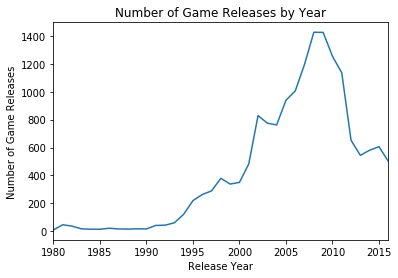

In [77]:
df.groupby(['year_of_release'])['name'].count().plot().set_title('Number of Game Releases by Year')
plt.xlabel("Release Year")
plt.ylabel("Number of Game Releases");

I don't have enough domain experience to understand if the data is representative for the earlier years. It it clear we have way less games for the first 20 years of data than the remaning 16 but I don't know if it is because we don't have as much data available or if it is really because way less games were being developed then as technoogy advanced and perhaps we have the same % of total games developed in 1910 vs 2010 for example. 

**Recommendation:** Company should hire video game consultant to provide insight on pre-2000s video game patterns if they are particularly interested in data in this period. However, spending too much focus worrying about this period vs the last 20 considering how fast the industry changing may not be the best use of time and resources.
 
What I can say is that it doesn't make sense there is a decline in the 2010s so the data for the last 6 years is most likely not representative of the total games being developed at the time. If we assume data is correct, there has been a sharp decline in the number of video game releases since 2010.

**Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 13 columns):
name                    16443 non-null object
platform                16443 non-null category
year_of_release         16443 non-null int32
genre                   16443 non-null category
na_sales                16443 non-null float64
eu_sales                16443 non-null float64
jp_sales                16443 non-null float64
other_sales             16443 non-null float64
critic_score            7982 non-null Int64
user_score              7462 non-null float64
rating                  9767 non-null category
total_sales             16443 non-null float64
console_manufacturer    16443 non-null object
dtypes: Int64(1), category(3), float64(6), int32(1), object(2)
memory usage: 1.4+ MB


In [79]:
df['platform'].nunique()

31

Choosing top 10 platforms by total sales

In [80]:
df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [81]:
top_10_platforms = df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head(10).to_frame().reset_index()['platform'].to_list()
top_10_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

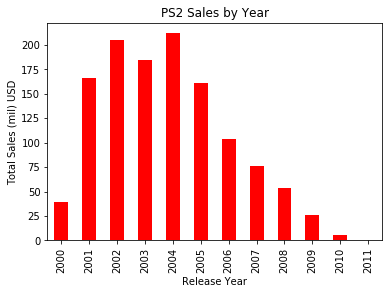

In [82]:
plt.title(top_10_platforms[0]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[0]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='red')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD");

PS2 active for 11 years

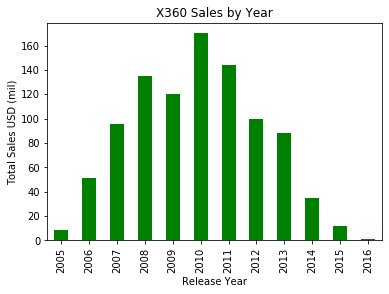

In [83]:
plt.title(top_10_platforms[1]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[1]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='green')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

X360 active for 11 years post-launch

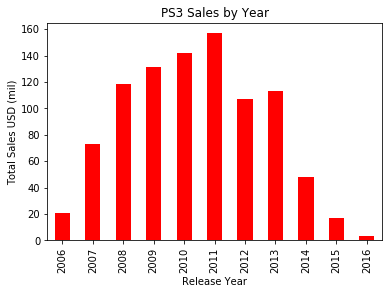

In [84]:
plt.title(top_10_platforms[2]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[2]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='red')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

PS3 was active for 10 years

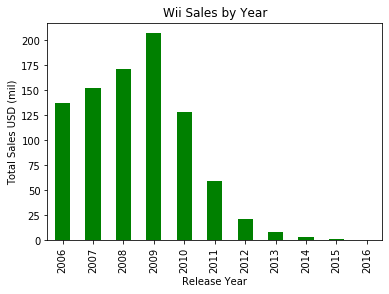

In [85]:
plt.title(top_10_platforms[3]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[3]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='green')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

Wii was active for 10 years

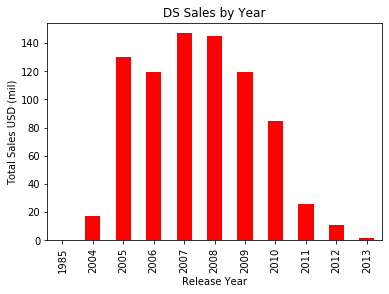

In [86]:
plt.title(top_10_platforms[4]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[4]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='red')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

DS was active for 9 years (assuming 1985 error)

Removing 1985 DS line(s), must be error as DS did not exist in 1985

In [87]:
df.loc[((df['platform']=='DS') & (df['year_of_release']==1985))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
15957,Strongest Tokyo University Shogi DS,DS,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02,Nintendo


In [88]:
df.drop([15957],inplace=True)

In [89]:
#expect no rows
df.loc[((df['platform']=='DS') & (df['year_of_release']==1985))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer


ok, now back to looking at each console

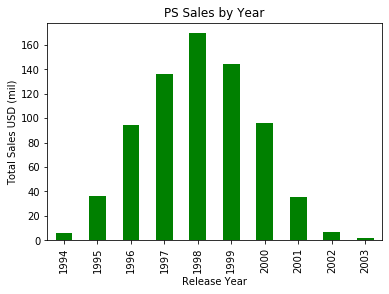

In [90]:
plt.title(top_10_platforms[5]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[5]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='green')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

PS active for 9 years

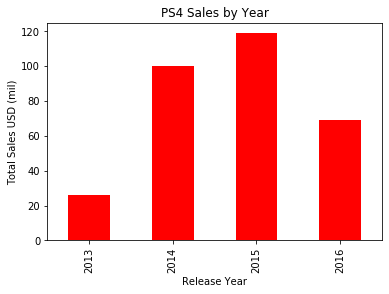

In [91]:
plt.title(top_10_platforms[6]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[6]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='red')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

PS4 active for 3 years

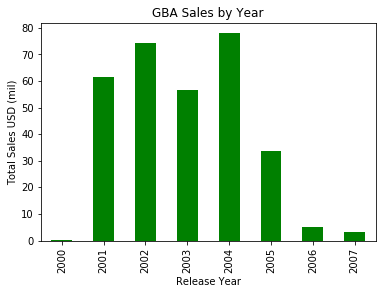

In [92]:
plt.title(top_10_platforms[7]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[7]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='green')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

GBA active for 7 years

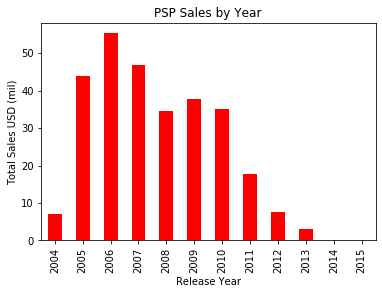

In [93]:
plt.title(top_10_platforms[8]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[8]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='red')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

PSP active for 11 years

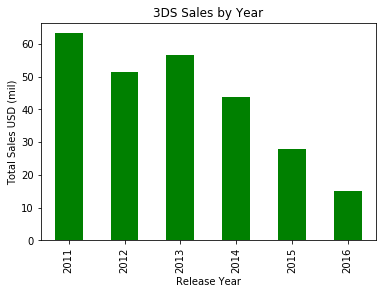

In [94]:
plt.title(top_10_platforms[9]+' Sales by Year')
df.loc[df['platform']==top_10_platforms[9]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', color='green')
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

3DS active for 5 years post-launch

Now, let's calculate how long each of the top 10 most successfull platforms lasted in market

In [95]:
top_10_df = df.loc[df['platform'].isin(top_10_platforms)==True].groupby(['platform'])['year_of_release'].agg({min, max}).reset_index()
top_10_df['product_life'] = top_10_df['max'] - top_10_df['min']
top_10_df[['platform','product_life']].sort_values(by='product_life', ascending=False).head(10)

,platform,product_life
16,PS2,11.0
19,PSP,11.0
28,X360,11.0
17,PS3,10.0
26,Wii,10.0
4,DS,9.0
15,PS,9.0
6,GBA,7.0
2,3DS,5.0
18,PS4,3.0


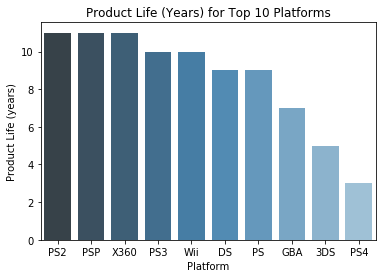

In [96]:
data = top_10_df[['platform','product_life']].sort_values(by='product_life', ascending=False).head(10).reset_index()
data['platform'] = data['platform'].astype('object') # to drop saved categories
sns.barplot(x="platform", y="product_life", data=data, palette="Blues_d").set_title('Product Life (Years) for Top 10 Platforms')
plt.xlabel("Platform")
plt.ylabel("Product Life (years)");

In [97]:
top_10_df['product_life'].sort_values().head(10).median()

9.5

In [98]:
top_10_df['product_life'].sort_values().head(10).mean()

8.6

**How long does it generally take for new platforms to appear and old ones to fade?**

Usually, it takes about 9 years for a new platform to fade

**Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.**

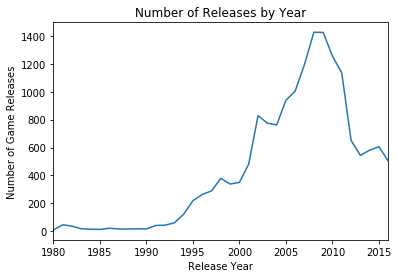

In [99]:
df.groupby(['year_of_release'])['name'].count().plot().set_title('Number of Releases by Year')
plt.xlabel("Release Year")
plt.ylabel("Number of Game Releases");

Based on the most popular platforms (by total sales) and data distribution (above), I will look at data from the last two decades represented in the dataframe starting in the year 2000.

**Work only with the data that you've decided is relevant. Disregard the data for previous years.**

In [100]:
old_df = df.copy()
df = df.loc[df['year_of_release']>=2000]
df['platform'] = df['platform'].astype('object').astype('category') # so # categories dropped to new number

In [101]:
# confirm earliest year in df is now 2000
df['year_of_release'].min()

2000

**Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.**

In [102]:
df['platform'].unique()

[Wii, DS, X360, PS3, PS2, ..., PS, N64, PSV, DC, WS]
Length: 20
Categories (20, object): [Wii, DS, X360, PS3, ..., N64, PSV, DC, WS]

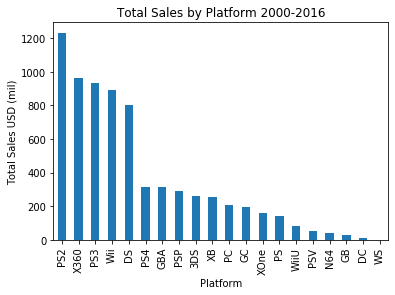

In [103]:
df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).plot(kind='bar').set_title('Total Sales by Platform 2000-2016')
plt.xlabel("Platform")
plt.ylabel("Total Sales USD (mil)");

The PS2 platform is leading in sales. As a matter of fact, it seems the platforms from Sony (Playstation variants) commonly tend to have high sales. Sony seems to be WAY more successful at making games for each variant of its Playstation successful (or close).

On the other hand, No XBox variant (from Microsoft) has been nearly as successful as the most recent one: the XBox 360 released in 2005. However considering this is their last console represented, it might be an indication that XBox is growing rapidly (especially from the original XBox, "XB") with more sales than its competitor PS3 and Nintendo Wii. Playstation's PS2 sold way more than the next iteration PS3 so they are on a decline while **XBox is on an incline**.

However, we cannot count Nintendo out! They are the oldest manufacturer represented and sell as much as newer console types during the same time as XBox 360, Wii, and PS3 are of the same generation and sold almost the same. Also, Nintendo's consoles change more drastically in each iteration (Nintendo 64 vs Gamecube vs Wii) and that pursuit of innovation might be a better bet in the future than upgrading the same console over and over again (Playstation, XBox). However, as a video game store this change is not beneficial because it makes compatibility between variants less likely. If we hold inventory (vs dropship or fulfilled by a 3rd party), then Nintendo is not as favorable as Playstation consoles because of the potential of loss inventory but if we manage inventory well (or outsource it), its innovation might carry our business. 

From this graph, it seems comparing platform by platform does not tell a fair story as it it is more beneficial to look at variants together which can be done on the manufacturer level as introduced here.

In [104]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'console_manufacturer'],
      dtype='object')

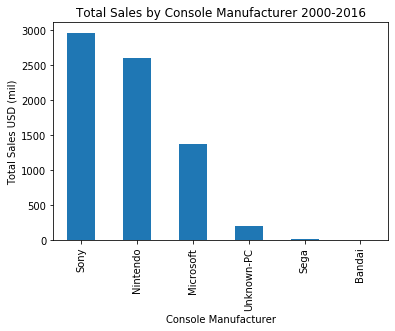

In [105]:
df.groupby(['console_manufacturer'])['total_sales'].sum().sort_values(ascending=False).plot(kind='bar').set_title('Total Sales by Console Manufacturer 2000-2016')
plt.xlabel("Console Manufacturer")
plt.ylabel("Total Sales USD (mil)");

With Playstation variations in top spots, I looked at manufacturer where we can see the **games for the Sony platforms (only variations of the Playstation) had the highest total sales** followed by games for Nintendo platforms.

Now, let's identify which were shrinking when comparing the last two years

In [106]:
df['2015_release_total_sales'] = np.where(df['year_of_release']==2015, df['total_sales'], 0)
df['2016_release_total_sales'] = np.where(df['year_of_release']==2016, df['total_sales'], 0)
#df['yoy % increase'] = (df['2016_releases_total_sales'] - df['2015_releases_total_sales']) / df['2015_releases_total_sales']

In [107]:
#2016 vs 2015
data = df.groupby(['platform'])[['2015_release_total_sales','2016_release_total_sales']].sum()
data['yoy % increase'] = (data['2016_release_total_sales'] - data['2015_release_total_sales']) / data['2015_release_total_sales']
data

,2015_release_total_sales,2016_release_total_sales,yoy % increase
platform,,,
3DS,27.78,15.14,-0.455004
DC,0.00,0.00,NaN
DS,0.00,0.00,NaN
GB,0.00,0.00,NaN
GBA,0.00,0.00,NaN
GC,0.00,0.00,NaN
N64,0.00,0.00,NaN
PC,8.52,5.25,-0.383803
PS,0.00,0.00,NaN


Comparing 2015 to 2016, all the active platforms of those years seem to be going down. However, we don't have certainty 2016 is a full year so I will do the same analysis 2014 vs 2015

In [108]:
df['2014_release_total_sales'] = np.where(df['year_of_release']==2014, df['total_sales'], 0)
data = df.groupby(['platform'])[['2014_release_total_sales','2015_release_total_sales']].sum()
data['yoy % increase'] = (data['2015_release_total_sales'] - data['2014_release_total_sales']) / data['2014_release_total_sales']
data

,2014_release_total_sales,2015_release_total_sales,yoy % increase
platform,,,
3DS,43.76,27.78,-0.365174
DC,0.00,0.00,NaN
DS,0.00,0.00,NaN
GB,0.00,0.00,NaN
GBA,0.00,0.00,NaN
GC,0.00,0.00,NaN
N64,0.00,0.00,NaN
PC,13.28,8.52,-0.358434
PS,0.00,0.00,NaN


2014 to 2016, the only platform going up was the XOne. Next, let's aggregate check by manufacturer

In [109]:
#2016 vs 2015
data = df.groupby(['console_manufacturer'])[['2015_release_total_sales','2016_release_total_sales']].sum()
data['yoy % increase'] = (data['2016_release_total_sales'] - data['2015_release_total_sales']) / data['2015_release_total_sales']
data

,2015_release_total_sales,2016_release_total_sales,yoy % increase
console_manufacturer,,,
Bandai,0.00,0.00,NaN
Microsoft,72.10,27.67,-0.616227
Nintendo,45.27,19.92,-0.559973
Sega,0.00,0.00,NaN
Sony,142.09,77.10,-0.457386
Unknown-PC,8.52,5.25,-0.383803


In [110]:
#2015 vs. 2014
data = df.groupby(['console_manufacturer'])[['2014_release_total_sales','2015_release_total_sales']].sum()
data['yoy % increase'] = (data['2015_release_total_sales'] - data['2014_release_total_sales']) / data['2014_release_total_sales']
data

,2014_release_total_sales,2015_release_total_sales,yoy % increase
console_manufacturer,,,
Bandai,0.00,0.00,NaN
Microsoft,88.81,72.10,-0.188154
Nintendo,69.54,45.27,-0.349008
Sega,0.00,0.00,NaN
Sony,159.90,142.09,-0.111382
Unknown-PC,13.28,8.52,-0.358434


In [111]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'console_manufacturer', '2015_release_total_sales',
       '2016_release_total_sales', '2014_release_total_sales'],
      dtype='object')

In [112]:
del df['2015_release_total_sales']
del df['2016_release_total_sales']
del df['2014_release_total_sales']
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'console_manufacturer'],
      dtype='object')

Again YOY shows just decreases, so it will be better to look over the time period.

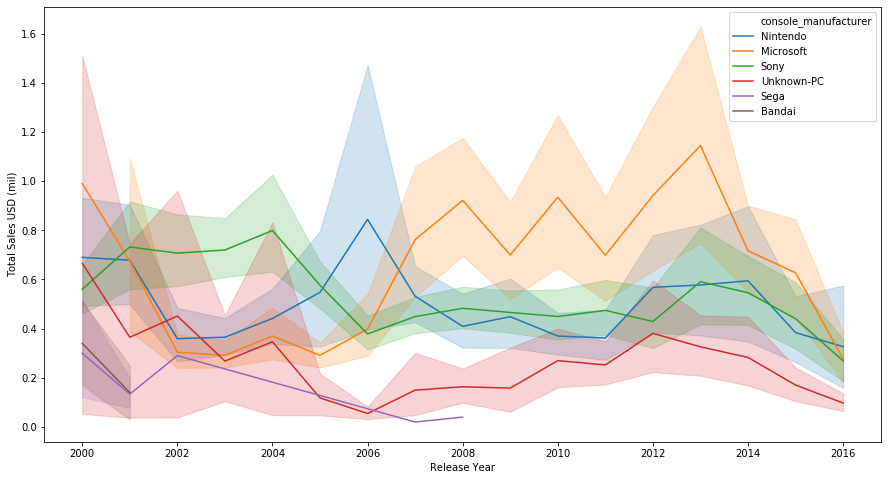

In [113]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="year_of_release", y="total_sales", hue="console_manufacturer")
plt.xlabel("Release Year")
plt.ylabel("Total Sales USD (mil)");

This visualization shows the most interesting insights:
* Games for Sega & Bandai consoles stopped selling over a decade ago 
* PC games were very popular in the early 2000s and are now the least popular
* Games for the XBox consoles (from Microsoft) have the best improvement, dominating the last 8 years and show the most opportunity. 
* Nintendo reigned in the mid 200s and since has lost its dominance but is growing again slowly in the last 4 years.
* Games for Playstation consoles (from Sony) dominated early 2000s but lost some of its sales, plateaud for late 2000s/early 2010s and is now seeing a small growth again like Nintendo. 


Hence, it seems XBox games are the best focus near-term followed by Nintendo and Playstation games which are seeing a resurgence.

In [114]:
df.loc[df['console_manufacturer']=='Bandai']['platform'].unique()

[WS]
Categories (1, object): [WS]

In [115]:
df.loc[df['console_manufacturer']=='Sega']['platform'].unique()

[DC]
Categories (1, object): [DC]

**What happened to Bandai and Sega?**
* Bandai (makers of the WonderSwan console "WS") merged with competitor Sega in 1997 and now focuses on toy-making [Source](https://www.cnet.com/news/bandai-and-sega-band-together/)
* Sega (makers of Dreamcast "DC"): Stopped production of Dreamcast in 2001 to get out of the hardware side of video games and pivotted to a software company making games for other consoles. [Source](https://web.archive.org/web/20151119111738/http://www.ign.com/articles/2001/01/24/sega-sinks-console-efforts)

**Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.**

*Moving forward I will use console_manufacturer rather than platform as it is ilogical to split all Playstations and Xbox versions*

In [116]:
df['console_manufacturer'].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'Unknown-PC', 'Sega', 'Bandai'],
      dtype=object)

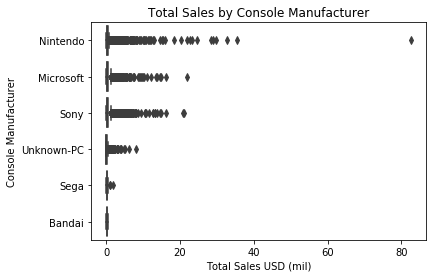

In [117]:
ax = sns.boxplot(x="total_sales", y="console_manufacturer", data=df).set_title('Total Sales by Console Manufacturer')
plt.xlabel("Total Sales USD (mil)")
plt.ylabel("Console Manufacturer");

In [118]:
#Which Nintendo game sold such extreme value?
df.loc[df['total_sales']> 40]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,Nintendo


It is impossible to compare sales of these manufacturers with the presence of outliers which can be extreme with one Nintendo game (Wii Sports) selling more than double the next one. To check if the differences in platforms is significant, it is best to remove these when answering the question.

The extreme total sales number for Wii Sports is not an anomaly. Wii Sports is actually the best-selling [single platform game of all time!](https://en.wikipedia.org/wiki/List_of_best-selling_video_games). I remember when it came out and its drastic impact, showcasing perfectly Nintendo Wii's revolutionary motion sensing ability to most audiences. 

In [119]:
Q1 = df['total_sales'].quantile(0.25)
Q3 = df['total_sales'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  0.05
Q3:  0.44
IQR:  0.39


In [120]:
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

min:  0
max:  1.025


In [121]:
#number of outliers
len(df.loc[(df['total_sales'] < bottom_cutoff) | (df['total_sales'] > top_cutoff)])

1574

In [122]:
#df without total sales outliers
df_wo_sales_outliers = df.loc[(df['total_sales'] >= bottom_cutoff) & (df['total_sales'] <= top_cutoff)]
len(df_wo_sales_outliers )

12895

I have removed outliers in total sales as a whole removing games that sold extreme amounts to be able to compare them. However, once data is sliced for just one manufacturer, there might be more outliers indentified for games that had extreme sales for that console type. These will remain

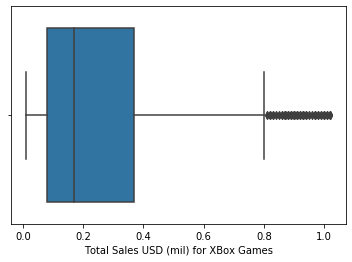

In [123]:
data = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Microsoft']
sns.boxplot(x=data["total_sales"])
plt.xlabel("Total Sales USD (mil) for XBox Games");

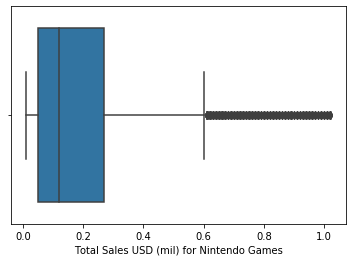

In [124]:
data = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Nintendo']
sns.boxplot(x=data["total_sales"])
plt.xlabel("Total Sales USD (mil) for Nintendo Games");

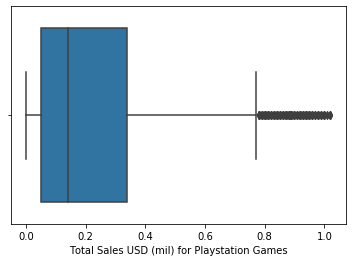

In [125]:
data = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Sony']
sns.boxplot(x=data["total_sales"])
plt.xlabel("Total Sales USD (mil) for Playstation Games");

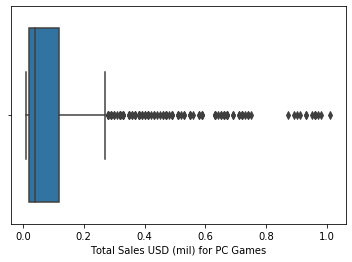

In [126]:
data = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Unknown-PC']
sns.boxplot(x=data["total_sales"])
plt.xlabel("Total Sales USD (mil) for PC Games");

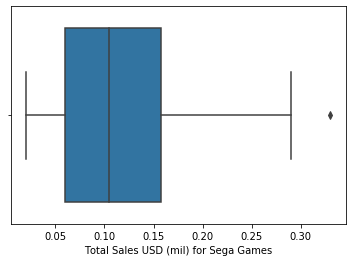

In [127]:
data = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Sega']
sns.boxplot(x=data["total_sales"])
plt.xlabel("Total Sales USD (mil) for Sega Games");

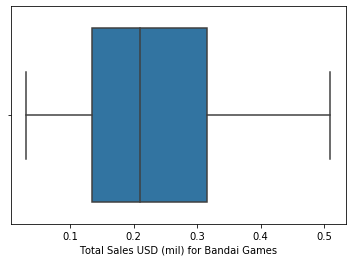

In [128]:
data = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Bandai']
sns.boxplot(x=data["total_sales"])
plt.xlabel("Total Sales USD (mil) for Bandai Games");

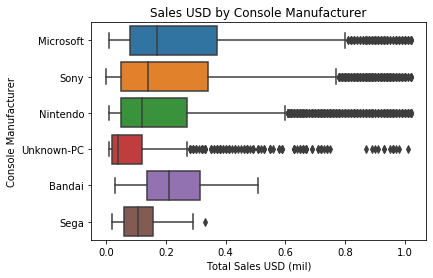

In [129]:
ax = sns.boxplot(x="total_sales", y="console_manufacturer", data=df_wo_sales_outliers).set_title("Sales USD by Console Manufacturer")
plt.ylabel("Console Manufacturer")
plt.xlabel("Total Sales USD (mil)");

In this graph, we can see all the console types at once. We see differences with Microsoft selling the most BUT is this difference significant? Let's check.

As Bandai and Sega are no longer being sold. I will check the differences between games for the relevant console types. 

In [130]:
nintendo = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Nintendo']
playstation = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Sony']
xbox = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Microsoft']
pc = df_wo_sales_outliers.loc[df_wo_sales_outliers['console_manufacturer']=='Unknown-PC']

In [131]:
alpha = 0.05

In [132]:
#Nintendo
print('Nintendo vs..')
print()
print('PlayStation')
results = st.ttest_ind(nintendo['total_sales'], playstation['total_sales'])
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Significant")
else:
        print("Not Significant")
print()
print('XBox')
results = st.ttest_ind(nintendo['total_sales'], xbox['total_sales'])
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Significant")
else:
        print("Not Significant")
print()
print('PC')
results = st.ttest_ind(nintendo['total_sales'], pc['total_sales'])
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Significant")
else:
        print("Not Significant")

Nintendo vs..

PlayStation
p-value:  1.2748302607446526e-08
Significant

XBox
p-value:  1.8255858478611813e-19
Significant

PC
p-value:  5.194906625540141e-29
Significant


In [133]:
#Playstation (remaining)
print('Playstation vs..')
print()
print('XBox')
results = st.ttest_ind(playstation['total_sales'], xbox['total_sales'])
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Significant")
else:
        print("Not Significant")
print()
print('PC')
results = st.ttest_ind(playstation['total_sales'], pc['total_sales'])
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Significant")
else:
        print("Not Significant")

Playstation vs..

XBox
p-value:  1.002129311000031e-05
Significant

PC
p-value:  8.108435864802676e-40
Significant


In [134]:
#XBox
print('XBos vs..')

print('PC')
results = st.ttest_ind(playstation['total_sales'], pc['total_sales'])
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Significant")
else:
        print("Not Significant")

XBos vs..
PC
p-value:  8.108435864802676e-40
Significant


The differences between sales by console manufacturer are all significant once outliers are removed.

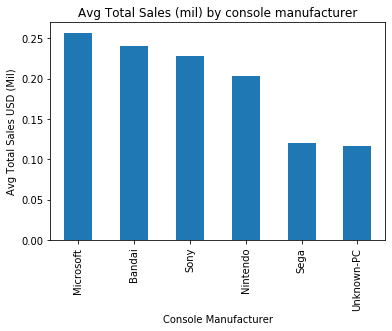

In [135]:
df_wo_sales_outliers.groupby(['console_manufacturer'])['total_sales'].mean().sort_values(ascending=False).plot(kind='bar').set_title('Avg Total Sales (mil) by console manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Avg Total Sales USD (Mil)");

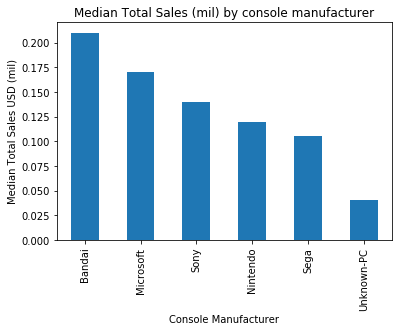

In [136]:
df_wo_sales_outliers.groupby(['console_manufacturer'])['total_sales'].median().sort_values(ascending=False).plot(kind='bar').set_title('Median Total Sales (mil) by console manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Median Total Sales USD (mil)");

Again, we will not provide recommendations on Bandai and Sega that no longer sell. Video games for XBox (from Microsoft) make the most revenue. Playstation follows and then Nintendo. PC games make the least revenue.

Sales have outliers. We will keep these moving forward but will make analaysis on median to counteract. 

**Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.**

As XBox consoles are currently the most popular, let's focus on those. 

In [137]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'console_manufacturer'],
      dtype='object')

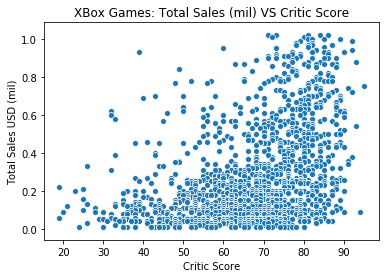

In [138]:
sns.scatterplot(data=xbox, x="critic_score", y="total_sales").set_title('XBox Games: Total Sales (mil) VS Critic Score')
plt.xlabel("Critic Score")
plt.ylabel("Total Sales USD (mil)");

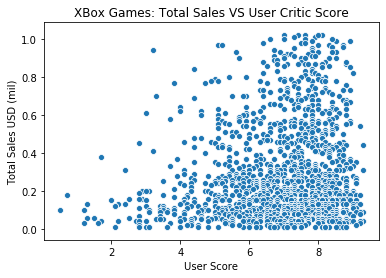

In [139]:
sns.scatterplot(data=xbox, x="user_score", y="total_sales").set_title('XBox Games: Total Sales VS User Critic Score')
plt.xlabel("User Score")
plt.ylabel("Total Sales USD (mil)");

In [140]:
xbox.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.037417,0.151691,0.020260,0.276756,-0.064541,-0.310111,0.057542
na_sales,-0.037417,1.000000,0.490019,0.048676,0.756810,0.386631,0.163173,0.924724
eu_sales,0.151691,0.490019,1.000000,0.075992,0.771318,0.301715,0.098901,0.777475
jp_sales,0.020260,0.048676,0.075992,1.000000,0.124078,0.086355,0.076940,0.136412
other_sales,0.276756,0.756810,0.771318,0.124078,1.000000,0.279962,0.027707,0.893578
critic_score,-0.064541,0.386631,0.301715,0.086355,0.279962,1.000000,0.620014,0.402748
user_score,-0.310111,0.163173,0.098901,0.076940,0.027707,0.620014,1.000000,0.155121
total_sales,0.057542,0.924724,0.777475,0.136412,0.893578,0.402748,0.155121,1.000000


There is a relationship between critic score and total sales. As critic score improve, total sales improve.

There isn't a strong relatonship between user score and total score. As user score improves, there are many games that are more likely to see but we can see many outliers with great sales and very low user scores.

**Video games with higher critical scores tend to have higher total sales**

**Keeping your conclusions in mind, compare the sales of the same games on other platforms.**

First, let's understand how often are games made for multiple platforms

In [141]:
df.groupby(['name'])['platform'].nunique().sort_values(ascending=False).head()

name
Need for Speed: Most Wanted    10
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Terraria                        8
Name: platform, dtype: int64

In [142]:
df.groupby(['name'])['platform'].nunique().median()

1.0

In [143]:
#number of games with more than 1 platform
sum(df.groupby(['name'])['platform'].nunique() > 1)

2548

In [144]:
# % games on more than 1 platform
sum(df.groupby(['name'])['platform'].nunique() > 1) / df['name'].nunique()

0.2626533347077621

In [145]:
multiple_platforms = df.groupby(['name'])['platform'].nunique().to_frame().reset_index()
multiple_platforms.rename(columns={"platform": "platform_count"}, inplace=True)
multiple_platforms = multiple_platforms.loc[multiple_platforms['platform_count']>1]
multiple_platforms['name'].nunique()

2548

In [146]:
df.loc[df['name'].isin(multiple_platforms['name'])==True]['platform'].value_counts()

PS3     1028
PS2     1017
X360     983
Wii      666
XB       573
DS       520
PC       468
GC       408
PSP      378
PS4      321
XOne     224
GBA      209
PSV      203
3DS      138
WiiU     100
PS        51
N64       19
GB         5
DC         5
WS         0
Name: platform, dtype: int64

Although most games are made for 1 platform, 26% were made for more than one. Of the games made for multiple platforms, they are most likely to be made for a Playstation console.

Let's find game titles that appear in multiple platforms. Below are the top 10 games sorted by the number of platforms it was made for.

In [147]:
df.groupby(['name'])['platform'].nunique().sort_values(ascending=False).head(10)

name
Need for Speed: Most Wanted                10
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Terraria                                    8
FIFA 15                                     8
LEGO Jurassic World                         8
FIFA Soccer 13                              8
The LEGO Movie Videogame                    8
LEGO Star Wars II: The Original Trilogy     8
Name: platform, dtype: int64

As we can see a game made for only Playstation but multiple versions of it (same for XBox). Let's isolate 10 made for consoles from different manuafacturers

In [148]:
df.groupby(['name'])['console_manufacturer'].nunique().sort_values(ascending=False).head(10)

name
The Sims 2                                                            4
CSI: Fatal Conspiracy                                                 4
The Sims                                                              4
Call of Duty: Black Ops II                                            4
Tom Clancy's Splinter Cell: Blacklist                                 4
Juiced 2: Hot Import Nights                                           4
The Amazing Spider-Man 2 (2014)                                       4
NBA 2K13                                                              4
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    4
Call of Duty: Ghosts                                                  4
Name: console_manufacturer, dtype: int64

In [149]:
# The Sims 2
df.loc[df['name']=='The Sims 2'].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
1416,The Sims 2,PSP,2005,simulation,0.49,0.55,0.0,0.33,65,6.9,T,1.37,Sony
2211,The Sims 2,DS,2005,simulation,0.81,0.05,0.0,0.07,70,6.1,E10+,0.93,Nintendo
2551,The Sims 2,PS2,2005,simulation,0.67,0.03,0.0,0.11,75,4.4,T,0.81,Sony
4934,The Sims 2,GBA,2005,simulation,0.28,0.10,0.0,0.01,58,7.5,E10+,0.39,Nintendo
5457,The Sims 2,GC,2005,simulation,0.26,0.07,0.0,0.01,73,8.3,T,0.34,Nintendo
5943,The Sims 2,PC,2004,simulation,0.02,0.24,0.0,0.04,90,8.8,T,0.30,Unknown-PC
6687,The Sims 2,XB,2005,simulation,0.19,0.05,0.0,0.01,75,7.1,T,0.25,Microsoft


In [150]:
# CSI: Fatal Conspiracy
df.loc[df['name']=='CSI: Fatal Conspiracy'].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
7263,CSI: Fatal Conspiracy,Wii,2010,adventure,0.12,0.08,0.0,0.02,NaN,NaN,M,0.22,Nintendo
8038,CSI: Fatal Conspiracy,PS3,2010,adventure,0.11,0.05,0.0,0.02,39,5.6,M,0.18,Sony
8393,CSI: Fatal Conspiracy,X360,2010,adventure,0.11,0.04,0.0,0.01,42,4.8,M,0.16,Microsoft
13886,CSI: Fatal Conspiracy,PC,2010,adventure,0.00,0.03,0.0,0.01,47,5.5,M,0.04,Unknown-PC


In [151]:
# The Amazing Spider-Man 2 (2014)
df.loc[df['name']=='The Amazing Spider-Man 2 (2014)'].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
3650,The Amazing Spider-Man 2 (2014),PS4,2014,action,0.20,0.25,0.02,0.09,NaN,NaN,NaN,0.56,Sony
6496,The Amazing Spider-Man 2 (2014),PS3,2014,action,0.06,0.14,0.02,0.04,NaN,NaN,NaN,0.26,Sony
6992,The Amazing Spider-Man 2 (2014),X360,2014,action,0.10,0.11,0.00,0.02,NaN,NaN,NaN,0.23,Microsoft
7253,The Amazing Spider-Man 2 (2014),XOne,2014,action,0.12,0.08,0.00,0.02,NaN,NaN,NaN,0.22,Microsoft
12384,The Amazing Spider-Man 2 (2014),3DS,2014,action,0.03,0.03,0.00,0.01,NaN,NaN,NaN,0.07,Nintendo
12720,The Amazing Spider-Man 2 (2014),WiiU,2014,action,0.03,0.02,0.00,0.00,NaN,NaN,NaN,0.05,Nintendo
16631,The Amazing Spider-Man 2 (2014),PC,2014,action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,Unknown-PC


In [152]:
# NBA 2K13
df.loc[df['name']=='NBA 2K13'].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
473,NBA 2K13,X360,2012,sports,2.60,0.20,0.01,0.19,88,7.2,E,3.00,Microsoft
628,NBA 2K13,PS3,2012,sports,1.73,0.43,0.05,0.27,90,8.0,E,2.48,Sony
4628,NBA 2K13,Wii,2012,sports,0.36,0.03,0.00,0.03,NaN,7.5,E,0.42,Nintendo
9597,NBA 2K13,WiiU,2012,sports,0.07,0.04,0.00,0.01,85,7.0,E,0.12,Nintendo
14655,NBA 2K13,PC,2012,sports,0.00,0.02,0.00,0.00,90,6.8,E,0.02,Unknown-PC


In [153]:
# Call of Duty: Black Ops II 
df.loc[df['name']=='Call of Duty: Black Ops II'].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
34,Call of Duty: Black Ops II,PS3,2012,shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,Sony
35,Call of Duty: Black Ops II,X360,2012,shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68,Microsoft
1227,Call of Duty: Black Ops II,PC,2012,shooter,0.64,0.69,0.00,0.19,74,4.2,M,1.52,Unknown-PC
4706,Call of Duty: Black Ops II,WiiU,2012,shooter,0.20,0.18,0.00,0.03,81,6.9,M,0.41,Nintendo


As seen, which platform a game sells most on actually changes between Nintendo, Xbox, or Playstation variations. The strategy of releasing a game for the top 3 console types is the best bet when feasible. However, I specifically chose games that were different genres and there is potential certain platforms are preferred for games within a genre.This inclination can be further studied by the company but out of scope for today. 

**Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?**

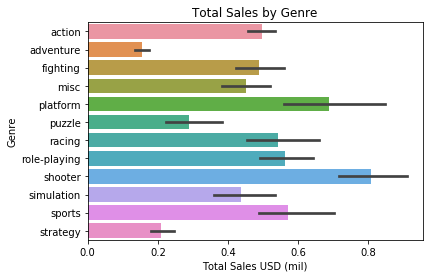

In [154]:
sns.barplot(x="total_sales", y="genre", data=df).set_title('Total Sales by Genre')
plt.xlabel("Total Sales USD (mil)")
plt.ylabel("Genre");

So far, the most profitable genres as a whole are "shooter" and "platform" followed by "sports" and "action". The least are adventure and strategy.

Although further research is required, I believe these two preferences are direct connections to the two audience types mostly using video games. Shooter games are most appealing to teens and young adults (unfortunately) which are the most common owner of a gaming console particularly XBox and Playstation with marketing and games that directly appeal to these segments. Platform games were traditionally more common on younger demographics (children) who are also more likely to own a gaming platform and have now expanded to teens and adults with fantasy-like.

It is also a reflection of focuses for each type of gaming console. XBox and Playstation consoles lead the way on shooter games while Nintendo is identified by its 'platform' games as it successfully differentiates from the rest.

Note, confirmed "platform" is not an error. Platform games are "characterized by their heavy use of jumping and climbing to navigate the player's environment and reach their goal". Popular examples are the common format for Mario Bros. games were a Mario player is navigating a world. More info [here](https://en.wikipedia.org/wiki/Platform_game#:~:text=Platform%20games%20(often%20simplified%20as,environment%20and%20reach%20their%20goal).

In [155]:
#reference for insight above
df.loc[df['genre']=='platform'].sort_values(by=['year_of_release'], ascending=False).head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
10821,Skylanders Imaginators,XOne,2016,platform,0.05,0.04,0.00,0.01,78,6.0,E10+,0.10,Microsoft
11081,Skylanders Imaginators,X360,2016,platform,0.04,0.05,0.00,0.01,NaN,NaN,E10+,0.10,Microsoft
10403,Skylanders Imaginators,PS3,2016,platform,0.02,0.07,0.00,0.02,NaN,NaN,E10+,0.11,Sony
11419,Mega Man Legacy Collection,PS4,2016,platform,0.07,0.00,0.00,0.02,77,6.1,E,0.09,Sony
8073,Skylanders Imaginators,WiiU,2016,platform,0.09,0.08,0.00,0.02,76,NaN,E10+,0.19,Nintendo
9099,Skylanders Imaginators,PS4,2016,platform,0.04,0.08,0.00,0.02,80,5.5,E10+,0.14,Sony
7457,Mega Man Legacy Collection,3DS,2016,platform,0.14,0.00,0.05,0.02,77,7.1,E,0.21,Nintendo
5320,Mirror's Edge Catalyst,PS4,2016,platform,0.11,0.16,0.02,0.05,69,4.7,T,0.34,Sony
14695,Mighty No. 9,WiiU,2016,platform,0.02,0.01,0.00,0.00,48,4.6,E10+,0.03,Nintendo
15580,Mighty No. 9,XOne,2016,platform,0.02,0.00,0.00,0.00,55,4.2,E10+,0.02,Microsoft


In [156]:
#reference for insight above
df.loc[df['genre']=='platform'].groupby(['console_manufacturer'])['name'].count()

console_manufacturer
Microsoft      79
Nintendo      417
Sega            1
Sony          212
Unknown-PC     11
Name: name, dtype: int64

In [157]:
#reference for insight above
df.loc[df['genre']=='shooter'].groupby(['console_manufacturer'])['name'].count()

console_manufacturer
Microsoft     359
Nintendo      210
Sega            2
Sony          415
Unknown-PC    143
Name: name, dtype: int64

But, what if one game sold a lot. Let's look at aggregates that take into account the number of games.

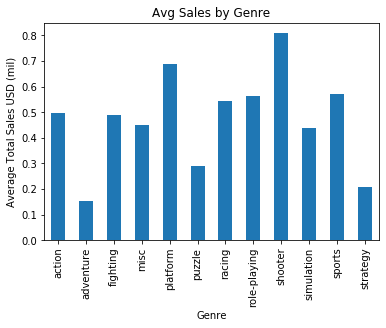

In [158]:
df.groupby(['genre'])['total_sales'].mean().plot(kind='bar').set_title('Avg Sales by Genre')
plt.xlabel("Genre")
plt.ylabel("Average Total Sales USD (mil)");

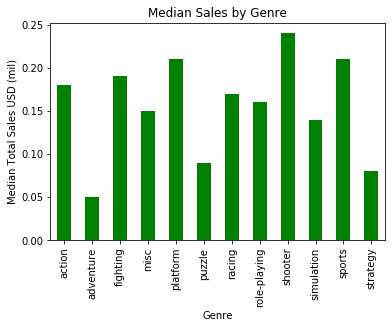

In [159]:
df.groupby(['genre'])['total_sales'].median().plot(kind='bar',color='green').set_title('Median Sales by Genre')
plt.xlabel("Genre")
plt.ylabel("Median Total Sales USD (mil)");

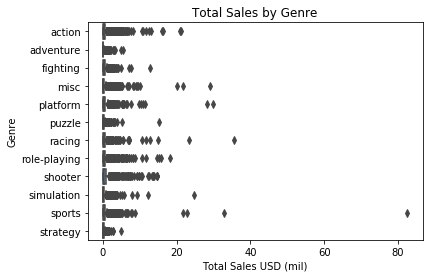

In [160]:
ax = sns.boxplot(x="total_sales", y="genre", data=df).set_title('Total Sales by Genre')
plt.xlabel("Total Sales USD (mil)")
plt.ylabel("Genre");

Interesting, there are some outliers that change patterns. Hence, it we look at median sales. Shooter generates the most sales per game, followed by 'sports', and 'platform'. The genred that generate the least sales per game are 'adventure', 'strategy', and 'puzzle'. 

As we want to make the make the most sales with the least amount if inventory possible, we should focus supply on having games for the genres 'shooter', 'sports', and 'platform' and minimize inventory for genres 'adventure', 'strategy, and 'puzzle

### Step 3: Conclusion

Exploratory Data Analysis is complete. During this step, I limited the release years to start in 2000, removed an erroneous DS record from 1985 when the platform didn't exit, and uncovered business insights. 

Below are the insights found out so far:
* Decline in 2010s. After game release peaked prior to 2010, we have seen a **recent steady decline in releases** since.  
* It usually takes about 9 years for a new platform to completely fade. - Do we have any games made for platforms over 9 years old? They may be lost revenue or collectible. 
* A look at trends: 
    * Games for Sega & Bandai consoles stopped selling over a decade ago. If we have any inventory, it is either lost revenue or collectible 
    * PC games were very popular in the early 2000s and are now the least popular and should not be a focus in our store.
    * Games for the XBox consoles (from Microsoft) have the best improvement in sales over time, dominating the last 8 years and show the most opportunity.Let's focus on it!  
    * Nintendo reigned in the mid 200s and since has lost its dominance but is growing again slowly in the last 4 years. This will our secondary focus. 
    * Games for Playstation consoles (from Sony) dominated early 2000s but lost some of its sales, plateaud for late 2000s/early 2010s and is now seeing a small growth again like Nintendo. Plan to have similar number of Nintendo and Playstation games
* Video games for XBox consoles make the most revenue. Playstation and Nintendo takes the next two spots in any order (as their difference is not significant). PC games make the least revenue. 
* Based on trends and which games sell more, **store should focus on XBox, PlayStation, and Nintendo games**. 
* Video games with higher critical scores tend to have more sales. Surprisingly, there isn't a correlation beteen user score and sales. - **How can store leverage critical scores in inventory planning, as they correlate with sales?** Maybe make part of the buying process.
* 26% games are made for multiple platforms. Of these, the most common variation is for a Playstation console. It seems when possible, a game will release three variations: Playstation, XBox, and Nintendo but within these platforms, a game behaves different based on genre. Potential certain platforms are preferred for a genre - **Should the store focus on buying the same game across platforms or choose a variation based on genre? - More research needed"
* We should **focus on 'shooter', 'sports' and 'platform games** which have the most sales and **limit inventory of 'adventure', 'strategy', and 'puzzle' games** with the least revenue

Limitation
* I assume the **total sales were not adjusted for inflation** and although we reduced the number of years. It is not fair to compare sales between a game released in 2000 vs almost 2 decades later. Back then, games were cheaper and consoles were much cheaper. This study would be improved if sales adjusted by revenue but out of scope.

## 4) Segmentation Analysis <a class="anchor" id="step4"></a>

**Step 4.** Create a user profile for each region
For each region (NA, EU, JP), determine:
* The top five platforms. Describe variations in their market shares from region to region.
* The top five genres. Explain the difference.
* Do ESRB ratings affect sales in individual regions?


In [161]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,console_manufacturer
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,Nintendo
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,Nintendo


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14469 entries, 0 to 16714
Data columns (total 13 columns):
name                    14469 non-null object
platform                14469 non-null category
year_of_release         14469 non-null int32
genre                   14469 non-null category
na_sales                14469 non-null float64
eu_sales                14469 non-null float64
jp_sales                14469 non-null float64
other_sales             14469 non-null float64
critic_score            7886 non-null Int64
user_score              7370 non-null float64
rating                  9662 non-null category
total_sales             14469 non-null float64
console_manufacturer    14469 non-null object
dtypes: Int64(1), category(3), float64(6), int32(1), object(2)
memory usage: 1.8+ MB


In [163]:
japan = df[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating', 'console_manufacturer']]
japan = japan.loc[japan['jp_sales']>0]

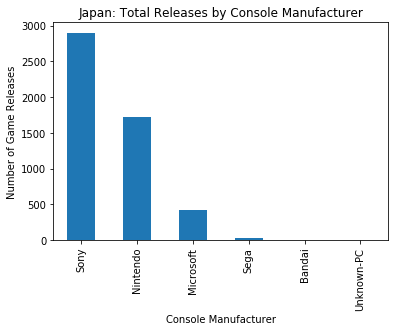

In [164]:
#number of releases that sell in Japan
japan['console_manufacturer'].value_counts().plot(kind='bar').set_title('Japan: Total Releases by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Number of Game Releases");

There are more games for the Playstation consoles a available for sale in Japan, followed by Nintendo. Both have way more than XBox.

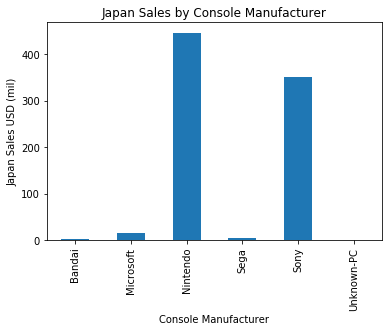

In [165]:
japan.groupby(['console_manufacturer'])['jp_sales'].sum().plot(kind='bar').set_title('Japan Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Japan Sales USD (mil)");

In total sales, Nintendo games have made the most sales combined in Japan, followed by Playstation games.

In [166]:
japan.groupby(['console_manufacturer'])['jp_sales'].sum()/japan['jp_sales'].sum()

console_manufacturer
Bandai        0.001177
Microsoft     0.017185
Nintendo      0.546775
Sega          0.004854
Sony          0.429911
Unknown-PC    0.000098
Name: jp_sales, dtype: float64

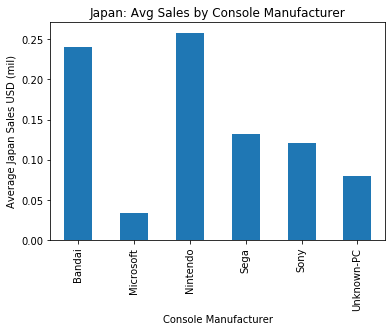

In [167]:
japan.groupby(['console_manufacturer'])['jp_sales'].mean().plot(kind='bar').set_title('Japan: Avg Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Average Japan Sales USD (mil)");

Average sales  in Japan show Nintendo games are the most successful but if outliers, use median.

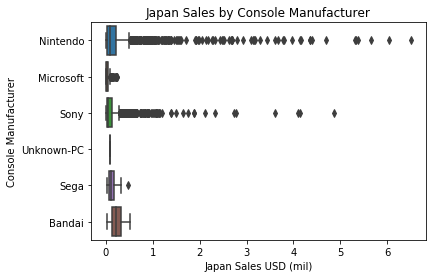

In [168]:
#Any outliers, use median
ax = sns.boxplot(x="jp_sales", y="console_manufacturer", data=japan).set_title('Japan Sales by Console Manufacturer')
plt.xlabel("Japan Sales USD (mil)")
plt.ylabel("Console Manufacturer");

Outliers present, will use median

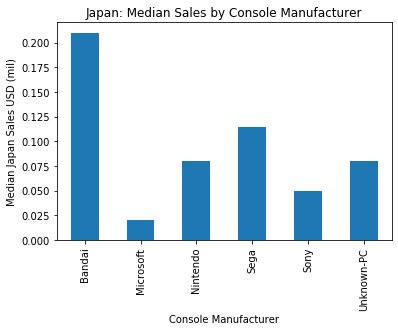

In [169]:
#outliers, use median
japan.groupby(['console_manufacturer'])['jp_sales'].median().plot(kind='bar').set_title('Japan: Median Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Median Japan Sales USD (mil)");

With Median, interestingly games for Bandai and Sega games were the most successful in this market but are no longer made. If we disregard these, **PC games** are the most successful with almost the same as **Nintendo**.

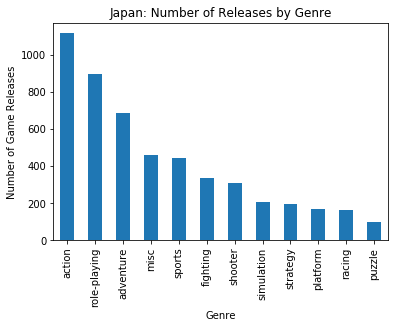

In [170]:
japan['genre'].value_counts().plot(kind='bar').set_title('Japan: Number of Releases by Genre')
plt.xlabel("Genre")
plt.ylabel("Number of Game Releases");

Japan has the most releases for action and role-playing games

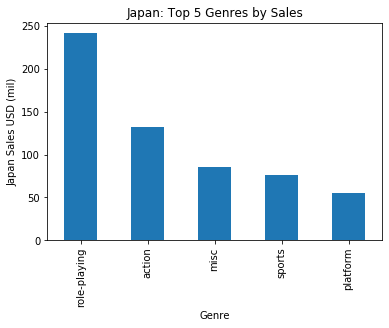

In [171]:
japan.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Japan: Top 5 Genres by Sales')
plt.xlabel("Genre")
plt.ylabel("Japan Sales USD (mil)");

Overall, the role-playing genre has been the most successful making total sales in combined games

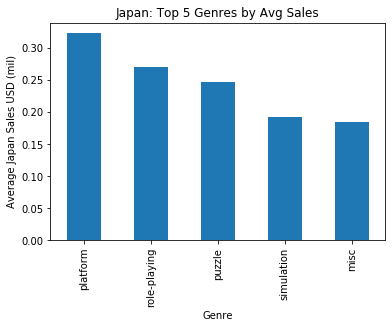

In [172]:
japan.groupby(['genre'])['jp_sales'].mean().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Japan: Top 5 Genres by Avg Sales')
plt.xlabel("Genre")
plt.ylabel("Average Japan Sales USD (mil)");

Average sales per game shows that platform games are the most successful in Japan but if outliers, will use median

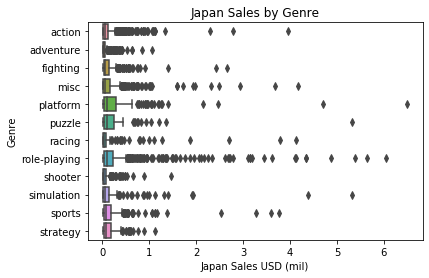

In [173]:
#Any outliers, use median
ax = sns.boxplot(x="jp_sales", y="genre", data=japan).set_title('Japan Sales by Genre')
plt.xlabel("Japan Sales USD (mil)")
plt.ylabel("Genre");

Outliers present, use median

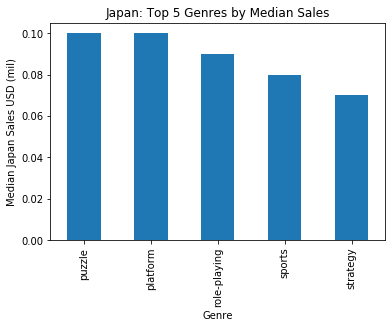

In [174]:
japan.groupby(['genre'])['jp_sales'].median().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Japan: Top 5 Genres by Median Sales')
plt.xlabel("Genre")
plt.ylabel("Median Japan Sales USD (mil)");

Now we can see that puzzle and platform games are the most sucessful in this segment. 

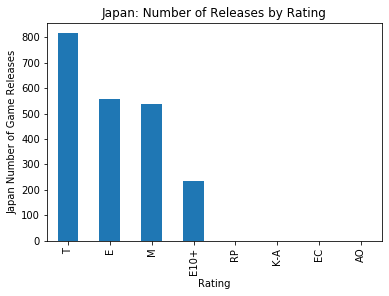

In [175]:
japan['rating'].value_counts().plot(kind='bar').set_title('Japan: Number of Releases by Rating')
plt.xlabel("Rating")
plt.ylabel("Japan Number of Game Releases");

In [176]:
df['rating'].isna().sum() / len(df)

0.3322275209067662

Japan sees most game releases with rating "T". However, note 33% games having ratings null.

In [177]:
japan['rating'].value_counts(normalize=True)

T       0.380308
E       0.259916
M       0.250117
E10+    0.109659
RP      0.000000
K-A     0.000000
EC      0.000000
AO      0.000000
Name: rating, dtype: float64

japan.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Japan: Top 5 Ratings by Sales')
plt.xlabel("Rating")
plt.ylabel("Japan Sales USD (mil)");

Games with Rating E (Everyone) have made the most combined sales in Japan

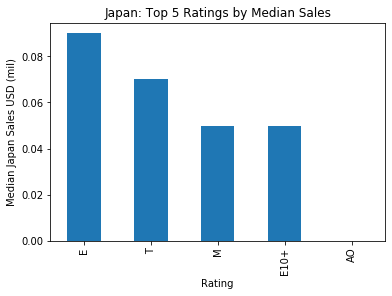

In [178]:
japan.groupby(['rating'])['jp_sales'].median().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Japan: Top 5 Ratings by Median Sales')
plt.xlabel("Rating")
plt.ylabel("Median Japan Sales USD (mil)");

A game rated E tends to be more successful in Japan than any other rating followed by T (Teen)

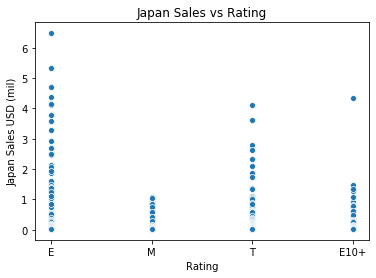

In [179]:
sns.scatterplot(data=japan, x="rating", y="jp_sales").set_title('Japan Sales vs Rating')
plt.xlabel("Rating")
plt.ylabel("Japan Sales USD (mil)");

Although we can see that games with rating E and T could make more, they can also make as much as other ratings so this is not the correlation expected.

Japan: 

Platforms
* They have the most releases in Playstation and Nintendo consoles. Sharp decrease on Xbox.
* Nintendo and Sony have made the most revenue in this market
* Bandai and Sega games made the most sales but are no longer made. 
* Nintendo and PC games have the most sales in this market.
* XBox has the least sales.

Genres
* Japan has the most releases for action, role-playing, and adventure
* Role-Playing games have made the most revenue in this market
* Per Game, the top sellers (in order) are 'puzzle', 'platform', and'role-playing'

Rating
* The most profitable game rating is E, followed by T.
* There isn't a correlation between rating and sales.

In [180]:
na = df[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating', 'console_manufacturer']]
na = na.loc[na['na_sales']>0]

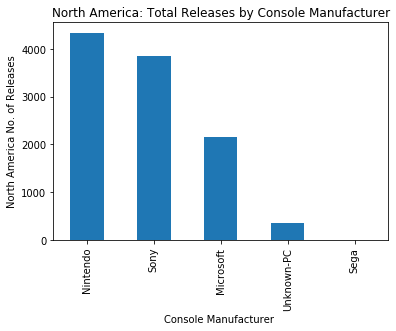

In [181]:
#number of releases that sell in North America
na['console_manufacturer'].value_counts().plot(kind='bar').set_title('North America: Total Releases by Console Manufacturer')
plt.xlabel("Console Manufacturer ")
plt.ylabel("North America No. of Releases");

There are more Nintendo games in the North America market than anything else, followed by Playstation ones.

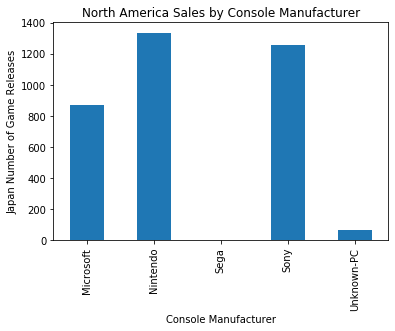

In [182]:
na.groupby(['console_manufacturer'])['na_sales'].sum().plot(kind='bar').set_title('North America Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Japan Number of Game Releases");

Nintendo games have made the most in combined sales, closely followed by Playstation games.

In [183]:
na.groupby(['console_manufacturer'])['na_sales'].sum()/na['na_sales'].sum()

console_manufacturer
Microsoft     0.246747
Nintendo      0.378226
Sega          0.000717
Sony          0.356198
Unknown-PC    0.018112
Name: na_sales, dtype: float64

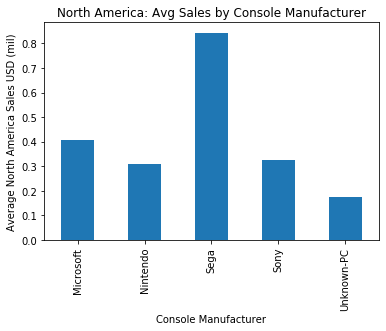

In [184]:
na.groupby(['console_manufacturer'])['na_sales'].mean().plot(kind='bar').set_title('North America: Avg Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Average North America Sales USD (mil)");

On average, Sega games were the most sucessfull followed by XBox. If outliers, median would be better

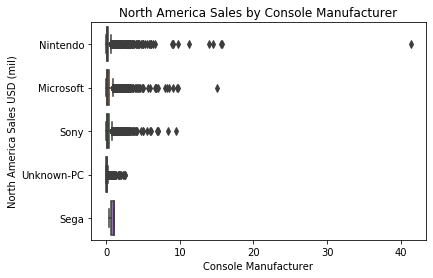

In [185]:
#Any outliers, use median
ax = sns.boxplot(x="na_sales", y="console_manufacturer", data=na).set_title('North America Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("North America Sales USD (mil)");

Outliers exist, use median

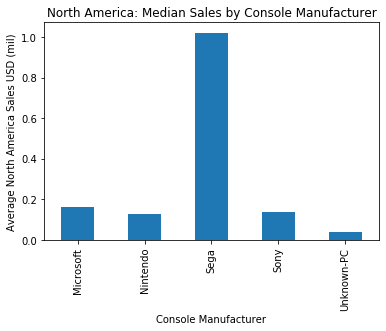

In [186]:
#outliers, use median
na.groupby(['console_manufacturer'])['na_sales'].median().plot(kind='bar').set_title('North America: Median Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Average North America Sales USD (mil)");

We can tell for sure Sega games were the most successful in North America but no longer sold, so of the remaining ones XBox games are the most successful in North America. However, it seems the differences between XBox, Playstation, and Nintendo games are not super large and it can be said the three are successful in this market.

In [187]:
na.groupby(['console_manufacturer'])['na_sales'].median()

console_manufacturer
Microsoft     0.16
Nintendo      0.13
Sega          1.02
Sony          0.14
Unknown-PC    0.04
Name: na_sales, dtype: float64

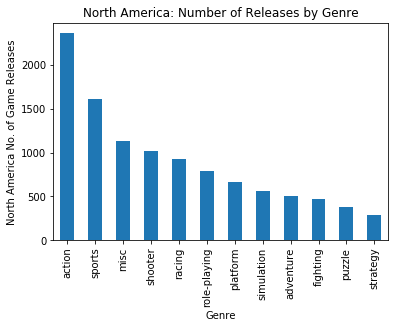

In [188]:
na['genre'].value_counts().plot(kind='bar').set_title('North America: Number of Releases by Genre')
plt.xlabel("Genre")
plt.ylabel("North America No. of Game Releases");

In North America, there have been more action and sports games in market than any other category

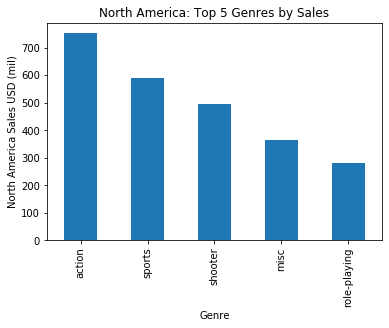

In [189]:
na.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar').set_title('North America: Top 5 Genres by Sales')
plt.xlabel("Genre")
plt.ylabel("North America Sales USD (mil)");

In North America, the action genre has generate the most in combined sales

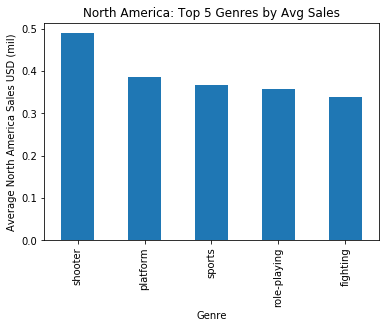

In [190]:
na.groupby(['genre'])['na_sales'].mean().sort_values(ascending=False).head(5).plot(kind='bar').set_title('North America: Top 5 Genres by Avg Sales')
plt.xlabel("Genre")
plt.ylabel("Average North America Sales USD (mil)");

In North America, the average shows shooter games are the most successful but let's look at median

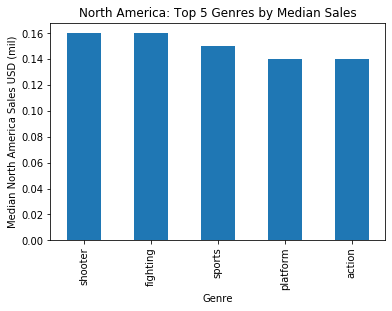

In [191]:
na.groupby(['genre'])['na_sales'].median().sort_values(ascending=False).head(5).plot(kind='bar').set_title('North America: Top 5 Genres by Median Sales')
plt.xlabel("Genre")
plt.ylabel("Median North America Sales USD (mil)");

When looking at median, Shooter and fighting games are the most successful in North America closely followed by Sports.

In [192]:
na['rating'].value_counts()

E       3662
T       2555
M       1384
E10+    1305
EC         8
AO         1
RP         0
K-A        0
Name: rating, dtype: int64

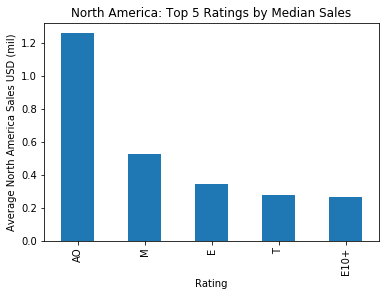

In [193]:
na.groupby(['rating'])['na_sales'].mean().sort_values(ascending=False).head(5).plot(kind='bar').set_title('North America: Top 5 Ratings by Median Sales')
plt.xlabel("Rating")
plt.ylabel("Average North America Sales USD (mil)");

Using average, adults only games seem to be the most succesful in North America

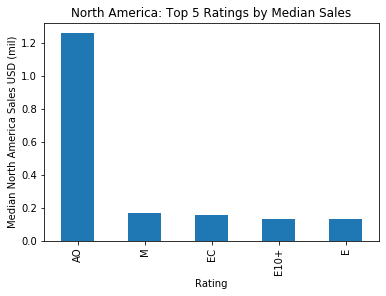

In [194]:
na.groupby(['rating'])['na_sales'].median().sort_values(ascending=False).head(5).plot(kind='bar').set_title('North America: Top 5 Ratings by Median Sales')
plt.xlabel("Rating")
plt.ylabel("Median North America Sales USD (mil)");

In [195]:
na.groupby(['rating'])['na_sales'].median().sort_values(ascending=False).head(5)

rating
AO      1.260
M       0.170
EC      0.155
E10+    0.130
E       0.130
Name: na_sales, dtype: float64

Now using median and removing the effect of outliers, adult-only games prove to be the most successful in North America but with low supply. It is best to look at the other ratings where see Manure and then Eearly Childhood are the next more successful games.

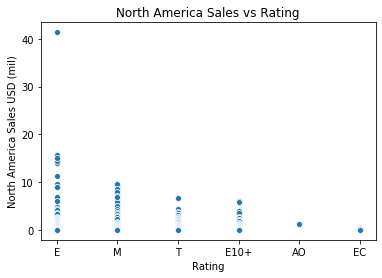

In [196]:
sns.scatterplot(data=na, x="rating", y="na_sales").set_title('North America Sales vs Rating')
plt.xlabel("Rating")
plt.ylabel("North America Sales USD (mil)");

Again, we see that altough there everyoneand mature games making more sales, they can also make just as any other rating so this doesn't show an evident correlation

North America

Platforms:
* They have the most releases in Nintendo and Playstation consoles. 
* Nintendo and Sony have made the most revenue in this market
* Sega made the most sales per game but are no longer made.
* XBox games make slightly more money than Nintendo and Playstation. 

Genres:
* North America has the most releases for 'action' games followed by 'sports'
* 'Shooter' and 'Fighting' games are the most profitable in this segment

Rating
* The most profitable game rating is AO (after there is a sharp decrease)
* There isn't a correlation between all rating and sales. We can see that some ratings have potential of charging more but games very wide within the range. Interestingly, AO (adult only) or EC (Early Childhood) games do have a direct correlation with sales.

In [197]:
eu = df[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating', 'console_manufacturer']]
eu = eu.loc[eu['eu_sales']>0]

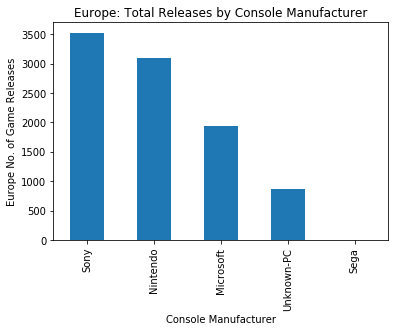

In [198]:
#number of releases that sell in Europe
eu['console_manufacturer'].value_counts().plot(kind='bar').set_title('Europe: Total Releases by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Europe No. of Game Releases");

There are more releases in the European market for Playstation than anything else, followed by Nintendo

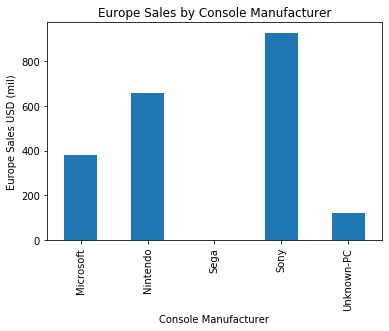

In [199]:
eu.groupby(['console_manufacturer'])['eu_sales'].sum().plot(kind='bar').set_title('Europe Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Europe Sales USD (mil)");

Playstation games have made the most in combined sales in  Europe.

In [200]:
eu.groupby(['console_manufacturer'])['eu_sales'].sum()/eu['eu_sales'].sum()

console_manufacturer
Microsoft     0.181990
Nintendo      0.315188
Sega          0.000379
Sony          0.444263
Unknown-PC    0.058180
Name: eu_sales, dtype: float64

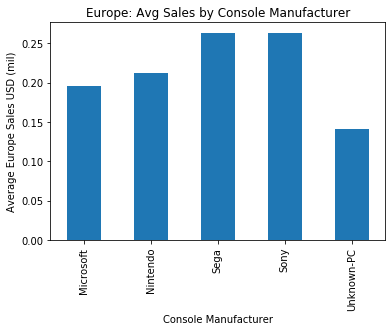

In [201]:
eu.groupby(['console_manufacturer'])['eu_sales'].mean().plot(kind='bar').set_title('Europe: Avg Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Average Europe Sales USD (mil)");

On average, Sega (no longer made) and Playstation games  are the most successful in Europe but let's look at median.

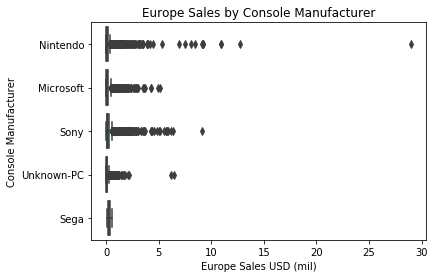

In [202]:
#Any outliers, use median
ax = sns.boxplot(x="eu_sales", y="console_manufacturer", data=eu).set_title('Europe Sales by Console Manufacturer')
plt.xlabel("Europe Sales USD (mil)")
plt.ylabel("Console Manufacturer");

Outliers present, use median

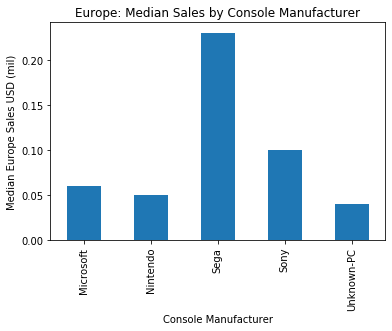

In [203]:
#outliers, use median
eu.groupby(['console_manufacturer'])['eu_sales'].median().plot(kind='bar').set_title('Europe: Median Sales by Console Manufacturer')
plt.xlabel("Console Manufacturer")
plt.ylabel("Median Europe Sales USD (mil)");

Now, we can see in Europe Playstation games are the most successful folloewd by XBox.

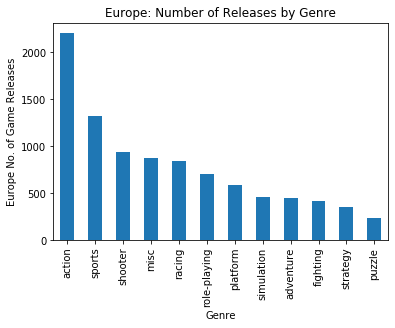

In [204]:
eu['genre'].value_counts().plot(kind='bar').set_title('Europe: Number of Releases by Genre')
plt.xlabel("Genre")
plt.ylabel("Europe No. of Game Releases");

In Europe, there are most releases in the action genre than anything else followed by Sports.

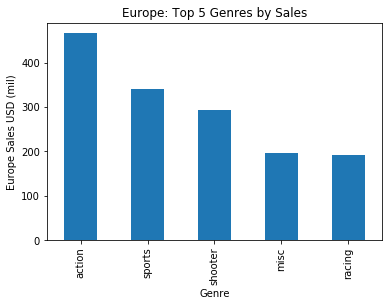

In [205]:
eu.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Europe: Top 5 Genres by Sales')
plt.xlabel("Genre")
plt.ylabel("Europe Sales USD (mil)");

Action has made the most in combined revenue within the Europe Market

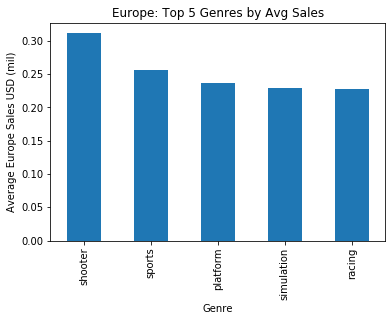

In [206]:
eu.groupby(['genre'])['eu_sales'].mean().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Europe: Top 5 Genres by Avg Sales')
plt.xlabel("Genre")
plt.ylabel("Average Europe Sales USD (mil)");

On average, the shooter games are the most successful in Europe but if the pattern remains and there are outliers, median would be better

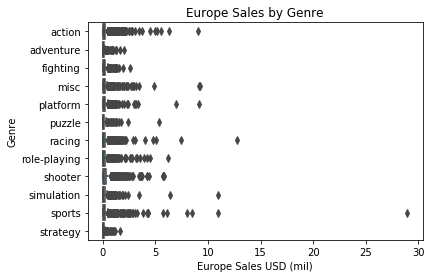

In [207]:
#Any outliers, use median
ax = sns.boxplot(x="eu_sales", y="genre", data=eu).set_title('Europe Sales by Genre')
plt.xlabel("Europe Sales USD (mil)")
plt.ylabel("Genre");

Outliers, use median

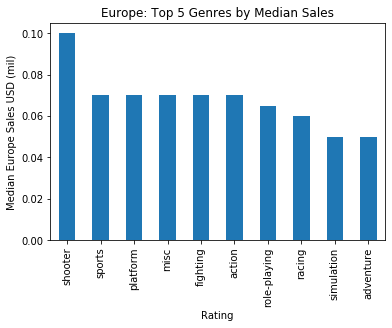

In [208]:
#Note: changed to more than 5 are the number was stable and wanted to see cutoff
eu.groupby(['genre'])['eu_sales'].median().sort_values(ascending=False).head(10).plot(kind='bar').set_title('Europe: Top 5 Genres by Median Sales')
plt.xlabel("Rating")
plt.ylabel("Median Europe Sales USD (mil)");

In Europe, we can see the most successful games are shooter and then sports, platform, fighting, and action follow it with about the same sales.

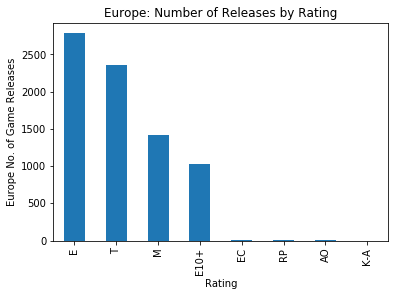

In [209]:
eu['rating'].value_counts().plot(kind='bar').set_title('Europe: Number of Releases by Rating')
plt.xlabel("Rating")
plt.ylabel("Europe No. of Game Releases");

In [210]:
eu['rating'].value_counts(normalize=True)

E       0.366535
T       0.310145
M       0.187352
E10+    0.135441
EC      0.000264
RP      0.000132
AO      0.000132
K-A     0.000000
Name: rating, dtype: float64

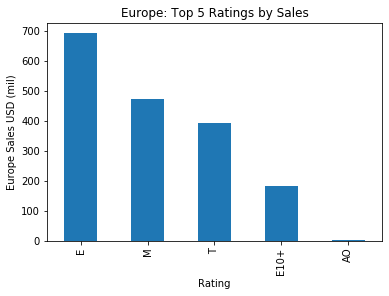

In [211]:
eu.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Europe: Top 5 Ratings by Sales')
plt.xlabel("Rating")
plt.ylabel("Europe Sales USD (mil)");

The rating E (everyone) has the most in combined sales in Europe

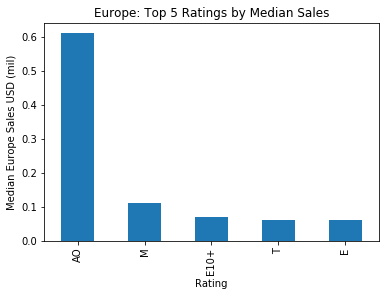

In [212]:
eu.groupby(['rating'])['eu_sales'].median().sort_values(ascending=False).head(5).plot(kind='bar').set_title('Europe: Top 5 Ratings by Median Sales')
plt.xlabel("Rating")
plt.ylabel("Median Europe Sales USD (mil)");

In Europe, adult only games are the most successful but less quantity. Besides this, Mature and Everyone 10+ seem to make more sales

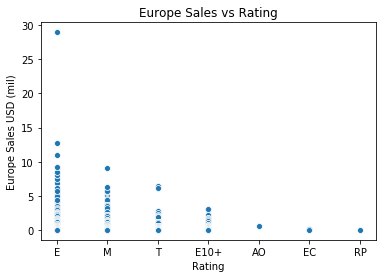

In [213]:
sns.scatterplot(data=eu, x="rating", y="eu_sales").set_title('Europe Sales vs Rating')
plt.xlabel("Rating")
plt.ylabel("Europe Sales USD (mil)");

As with othe regions, we can see that some ratings have had games that make more sales but games can all sell low too. This is not the drastic correlation expected.

Europe

Platforms: 
* They have the most releases for Playstation, followed by Nintendo. PC has the least releases
* Sony has made the most sales in Playstation games, followed by Nintendo. 
* A Sega game sold more here, than any other but are no longer made. Playstation games make the most sales here, followed by XBox and Nintendo.

Genres
* The genre with the most releases in Euroope is 'action' followed by 'sports'
* 'Shooter' games make the most revenue in this market, with the subsequent categories (sports, platform, miscellaneous, fighting, and action selling almost the same.
* Rating

Rating
* Europe has the most releases in the categories of E (everyone) and Teen
* Adult One games make more money individually than any other rating, with a sharp decrease after. 
* There isn't a correlation between all rating and sales. We can see that some ratings have potential of charging more but games vary wide within the range. Interestingly, AO (adult only), EC (Early Childhood), or RP (Rating Pending) games do have a direct correlation with sales.

### Step 4: Conclusion

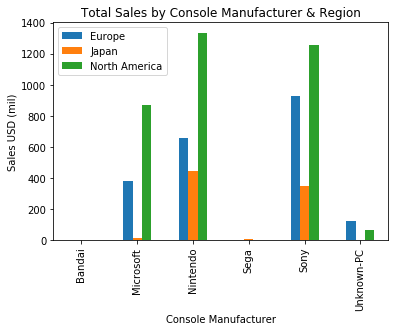

In [214]:
#Total Sales
df.groupby(['console_manufacturer'])[['eu_sales', 'jp_sales', 'na_sales']].sum().rename(columns={"eu_sales": "Europe", "jp_sales": "Japan", "na_sales": "North America"}).plot(kind='bar').set_title('Total Sales by Console Manufacturer & Region')
plt.xlabel("Console Manufacturer")
plt.ylabel("Sales USD (mil)");

North America generates the most sales ($) in games for Playstation, Nintendo, and XBox consoles. However, Nintendo has generated the most sales in North America and emerging market Japan (see next insight) while in Europe Playstation games have generated the most revenue.

Although PCs are not very profitable games, it is interesting to observe Japan does not buy any and that they are more popular in Europe than North America.

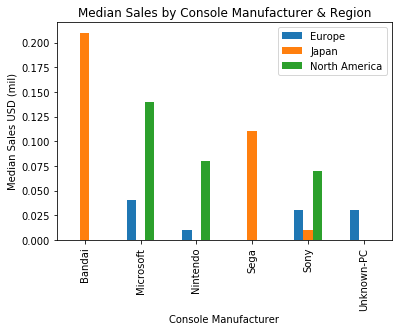

In [215]:
#Median sales per platform
df.groupby(['console_manufacturer'])[['eu_sales', 'jp_sales', 'na_sales']].median().rename(columns={"eu_sales": "Europe", "jp_sales": "Japan", "na_sales": "North America"}).plot(kind='bar').set_title('Median Sales by Console Manufacturer & Region')
plt.xlabel("Console Manufacturer")
plt.ylabel("Median Sales USD (mil)");

In here, we are looking at about how much each title/game sells. Japan sticks out as having a pattern very different than the other two regions. Games for Sega and Bandai consoles sold the most in Japan but those games are no longer made. Hence, this is an area of opportunity for Sony, Nintendo, and Microsoft but it seems Sony and its Playstation console games have encountered some success so far there. 

Where sold, an XBox game sells more than the remaining current platforms in both North America and Europe. 

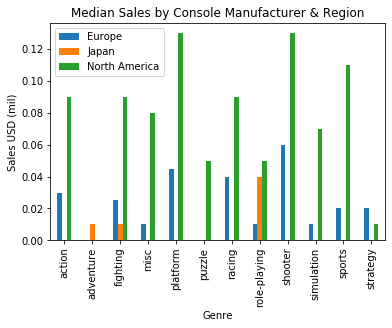

In [216]:
df.groupby(['genre'])[['eu_sales', 'jp_sales', 'na_sales']].median().rename(columns={"eu_sales": "Europe", "jp_sales": "Japan", "na_sales": "North America"}).plot(kind='bar').set_title('Median Sales by Console Manufacturer & Region')
plt.xlabel("Genre")
plt.ylabel("Sales USD (mil)");

In most genres, games in North America sell more except strategy and adventure. Japan tends to have different taste in genre with role-playing and adventure games selling more than any other genre. Europe and North America are much more alike with some highlights that America likes platform games as much as shooter which is not the case in Europe where shooter games have a clear lead. Also, North America tends to sell much more in sports game proportionally than Europe. 

Text(0.5, 1.0, 'Median Sales by Console Manufacturer & Region')

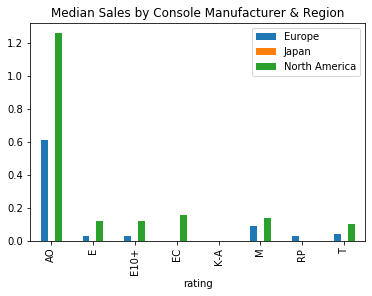

In [217]:
df.groupby(['rating'])[['eu_sales', 'jp_sales', 'na_sales']].median().rename(columns={"eu_sales": "Europe", "jp_sales": "Japan", "na_sales": "North America"}).plot(kind='bar').set_title('Median Sales by Console Manufacturer & Region')
#plt.xlabel("Rating")
#plt.ylabel("Median Sales USD (mil)");

As we saw in scatter plots, there weren't strong correlations between rating and sales in any of the regions but it is noteworthy to see that Adults only (AO) games make the most sales per title than any other category by far in both North America and Europe. 

## 5) Hypothesis Testing <a class="anchor" id="step5"></a>

**Step 5.** Test the following hypotheses:
* Average user ratings of the Xbox One and PC platforms are the same.
* Average user ratings for the Action and Sports genres are different.
    * Set the alpha threshold value yourself.

Explain:
* How you formulated the null and alternative hypotheses
* What significance level you chose to test the hypotheses, and why

**Average user ratings of the Xbox One and PC platforms are the same.**

The null hypothesis will be what we are trying to disprove, that the ratings are the same. Hence:

* H0 (Null Hypothesis): Average User Ratings of XBox One == Average User Ratings PC

* HA (Alternative Hypothesis): Average User Ratings of XBox One == Average User Ratings PC

Confidence Level: 95% (Alpha 5%) -- 0.05 Alpha chosen as it is standard practice and I don't have domain experience to alter it.

In [218]:
for x in df['platform'].unique():
    print(x)

Wii
DS
X360
PS3
PS2
GBA
PS4
3DS
XB
PC
PSP
XOne
WiiU
GC
GB
PS
N64
PSV
DC
WS


In [219]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'console_manufacturer'],
      dtype='object')

In [220]:
alpha = .05

a = df.loc[df['platform']=='XOne']['user_score'].dropna()
b = df.loc[df['platform']=='PC']['user_score'].dropna()

results = st.ttest_ind(a, b)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  3.750185722417337e-05
We reject the null hypothesis


As the p-value is less than 0.05, there is a significant difference between the user score of XBox one games and PC games. Hence, we can reject the hypothesis that the user ratings between XBox One and pC is the same and **accept the alternative hypoothesis that theaverage user rating between XBox One and PC games differs**.

**Average user ratings for the Action and Sports genres are different.**

The null hypothesis will be what we are trying to disprove, that the ratings are the same. Hence:

* H0 (Null Hypothesis): Average User Ratings of Action games == Average User Ratings of Sports games

* HA (Alternative Hypothesis): Average User Ratings of Action games != Average User Ratings of Sports games

Confidence Level: 95% (Alpha 5%)

In [221]:
alpha = .05

a = df.loc[df['genre']=='action']['user_score'].dropna()
b = df.loc[df['genre']=='sports']['user_score'].dropna()

results = st.ttest_ind(a, b)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.0952446346492898
We can't reject the null hypothesis


In [222]:
df.loc[df['genre']=='action']['user_score'].mean()

7.045648512071869

In [223]:
df.loc[df['genre']=='sports']['user_score'].mean()

6.949072356215214



The p-value tells us that although we can see a difference in the user rating between sports and action games, there is a 9.5% probability of randomly getting a difference that size or larger and hence it is not statistically significant as it is above 5%. Hence, **we can't reject the null hypothesis that there is not a difference among the two groups** and **we can't accept the alternative hypothesis that there is a significant difference among user ratings of sports and action games.**. Essentially, the research is inconclusive. 

## 6) Conclusion <a class="anchor" id="step6"></a>

**Step 6.** Write a general conclusion

Format: Complete the task in the Jupyter Notebook. Insert the programming code in the code cells and text explanations in the markdown cells. Apply formatting and add headings.


### Objectives Review

* Answer: **What makes a game succeed?"**
* Interpret findings for online game store to use to "to spot potential big winners and plan advertising 2017 campaigns"

### What Makes a Game Succeed?

In short, the answer is the right combination of genre, platform, and rating depending on which geographical market you are looking to target. Let's break this down. 

**Which geographical market should we target?**
* Japan is an area of opportunity as they have transitioned from consoles without new releases (Bandai and Sega ones) to more current ones. However, the market's taste is so unique it has a higher risk and it is more cost effective to focus on North America and Europe where there is plenty of chance of overlapping taste.
* North America makes the most revenue and has less language variation (especially as a good portion of Canada, Ontario, is English-Speaking) which affects marketing content and staff so it seems like the best choice. Before proceeding, I would try to source data and analyze an important metric missed here: **how many video game stores are there in North America vs Europe (particularly online)?**. We may have a case where although there are more sales, there is also much more competition. 

**If North America chosen, what makes a game succeed? What types of games should the marketing and supply strategy revolve around?**

* **Timing**: We should focus on games for current platforms with less then 4.5 years out (the middle of its product life).
* **Platform**: XBox consoles should be the primary focus, followed equally by Nintendo and Playstation consoles.  A bonus is that these platforms have a higher chance of having games that are multi-platform (same title across platforms) and hence when we choose games for campaigns, the best bet is a multi-platform one. Although still used, I would completely disregard unpopular PC games.
* **Genre**: "Shooter" and "Platform games sell the most in North America (and Europe!). These are indicators of two different age groups and taste and showcasing both widens our reach. If needed, 'Sports' games sell well and have wide appeal.
* **Critical Acclaim**: As critical acclaim increases, so do sales. Hence, we should remain flexible. If a game is receiving positive critical reviews, we should focus our efforts in promoting it (particularly if it is multi-platform, from genres shooter or platform, and assumingly from a recent console).